# Breast Cancer Detection using Machine Learning

**Breast cancer** is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

## Dataset description

Our breast cancer dataset has 569 data points and thirty-two features. The features are:

- id - The unique id of a patient.
- diagnosis - Target variable. Malignant or Benign.
- radius_mean - Radius of lobes.
- texture_mean - Mean of surface texture.
- perimeter_mean - Outer perimeter of lobes.
- area_mean - Mean area of lobes.
- smoothness_mean - Mean of smoothness levels.
- compactness_mean - Mean of compactness.
- concavity_mean - Mean of concavity.
- concave points_mean - Mean of concave points.
- symmetry
- fractal dimension

<b> The other features are basically the derivation of these mentioned above. </b>

## EDA

In [1]:
import pandas as pd
from warnings import filterwarnings
import sweetviz as sv
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from utils import train_evaluate_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' %x)
RANDOM_STATE = 11

C:\ProgramData\anaconda3\envs\ml_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '../data/'
file_name = 'breast-cancer.csv'

data = pd.read_csv(data_dir + file_name)

In [3]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe().T

count        mean          std     min       25%  \
id                      569.00 30371831.43 125020585.61 8670.00 869218.00   
radius_mean             569.00       14.13         3.52    6.98     11.70   
texture_mean            569.00       19.29         4.30    9.71     16.17   
perimeter_mean          569.00       91.97        24.30   43.79     75.17   
area_mean               569.00      654.89       351.91  143.50    420.30   
smoothness_mean         569.00        0.10         0.01    0.05      0.09   
compactness_mean        569.00        0.10         0.05    0.02      0.06   
concavity_mean          569.00        0.09         0.08    0.00      0.03   
concave points_mean     569.00        0.05         0.04    0.00      0.02   
symmetry_mean           569.00        0.18         0.03    0.11      0.16   
fractal_dimension_mean  569.00        0.06         0.01    0.05      0.06   
radius_se               569.00        0.41         0.28    0.11      0.23   
texture_se              569.00        1.22         0.55    0.36      0.83   
perimeter_se            569.00        2.87         2.02    0.76      1.61   
area_se                 569.00       40.34        45.49    6.80     17.85   
smoothness_se           569.00        0.01         0.00    0.00      0.01   
compactness_se          569.00        0.03         0.02    0.00      0.01   
concavity_se            569.00        0.03         0.03    0.00      0.02   
concave points_se       569.00        0.01         0.01    0.00      0.01   
symmetry_se             569.00        0.02         0.01    0.01      0.02   
fractal_dimension_se    569.00        0.00         0.00    0.00      0.00   
radius_worst            569.00       16.27         4.83    7.93     13.01   
texture_worst           569.00       25.68         6.15   12.02     21.08   
perimeter_worst         569.00      107.26        33.60   50.41     84.11   
area_worst              569.00      880.58       569.36  185.20    515.30   
smoothness_worst        569.00        0.13         0.02    0.07      0.12   
compactness_worst       569.00        0.25         0.16    0.03      0.15   
concavity_worst         569.00        0.27         0.21    0.00      0.11   
concave points_worst    569.00        0.11         0.07    0.00      0.06   
symmetry_worst          569.00        0.29         0.06    0.16      0.25   
fractal_dimension_worst 569.00        0.08         0.02    0.06      0.07   

                              50%        75%          max  
id                      906024.00 8813129.00 911320502.00  
radius_mean                 13.37      15.78        28.11  
texture_mean                18.84      21.80        39.28  
perimeter_mean              86.24     104.10       188.50  
area_mean                  551.10     782.70      2501.00  
smoothness_mean              0.10       0.11         0.16  
compactness_mean             0.09       0.13         0.35  
concavity_mean               0.06       0.13         0.43  
concave points_mean          0.03       0.07         0.20  
symmetry_mean                0.18       0.20         0.30  
fractal_dimension_mean       0.06       0.07         0.10  
radius_se                    0.32       0.48         2.87  
texture_se                   1.11       1.47         4.88  
perimeter_se                 2.29       3.36        21.98  
area_se                     24.53      45.19       542.20  
smoothness_se                0.01       0.01         0.03  
compactness_se               0.02       0.03         0.14  
concavity_se                 0.03       0.04         0.40  
concave points_se            0.01       0.01         0.05  
symmetry_se                  0.02       0.02         0.08  
fractal_dimension_se         0.00       0.00         0.03  
radius_worst                14.97      18.79        36.04  
texture_worst               25.41      29.72        49.54  
perimeter_worst             97.66     125.40       251.20  
area_worst                 686.50    1084.00      4254.00  


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data['diagnosis'].value_counts(normalize=True)

diagnosis
B   0.63
M   0.37
Name: proportion, dtype: float64

In [9]:
data['id'].nunique()

569

In [10]:
# save ids into different variable for later use

ids = data['id']

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



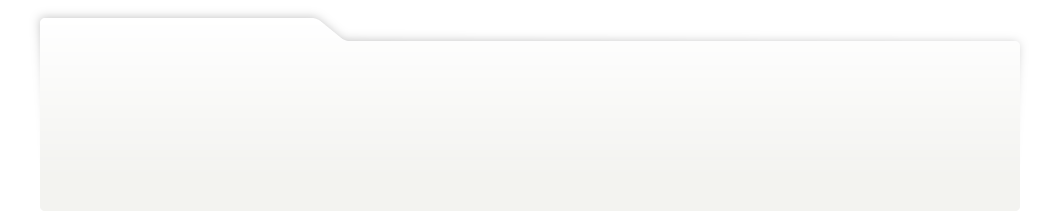
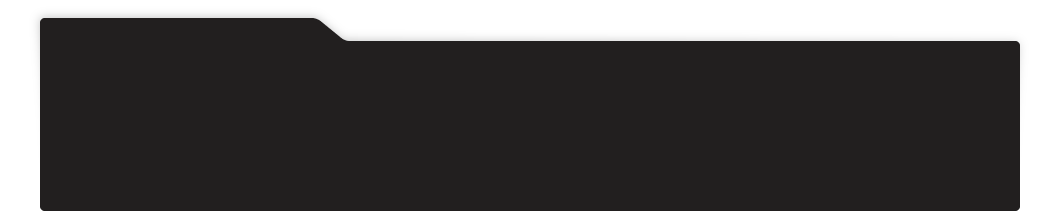
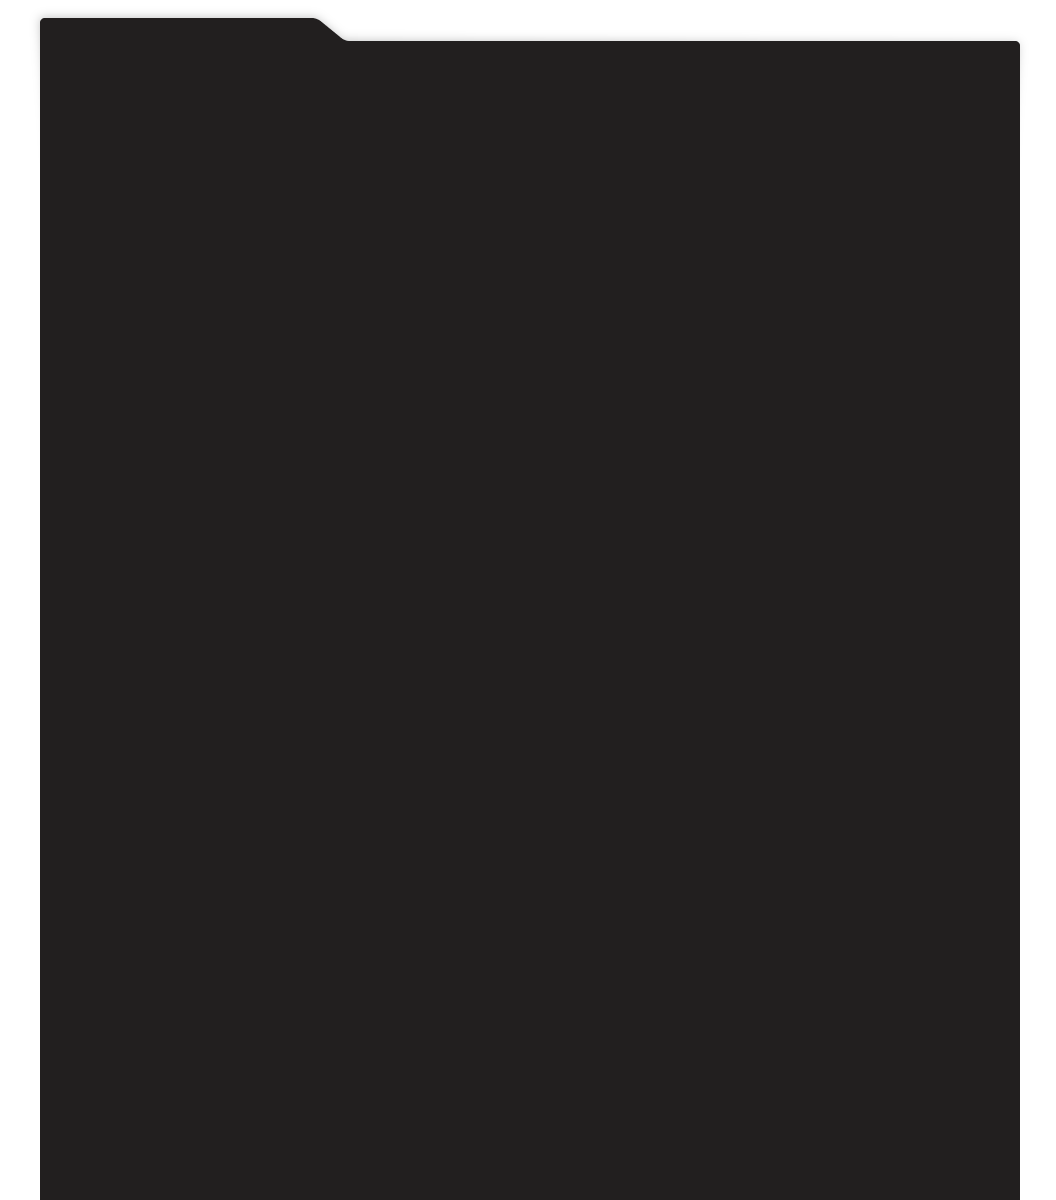
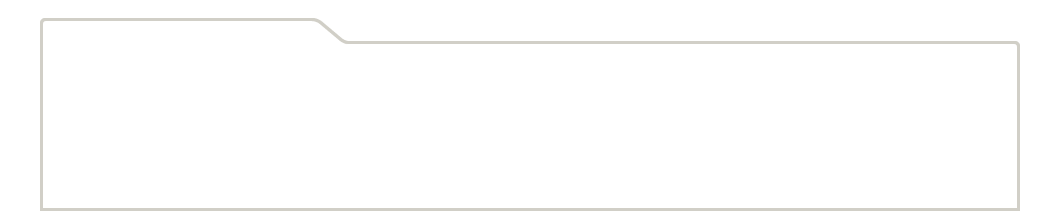
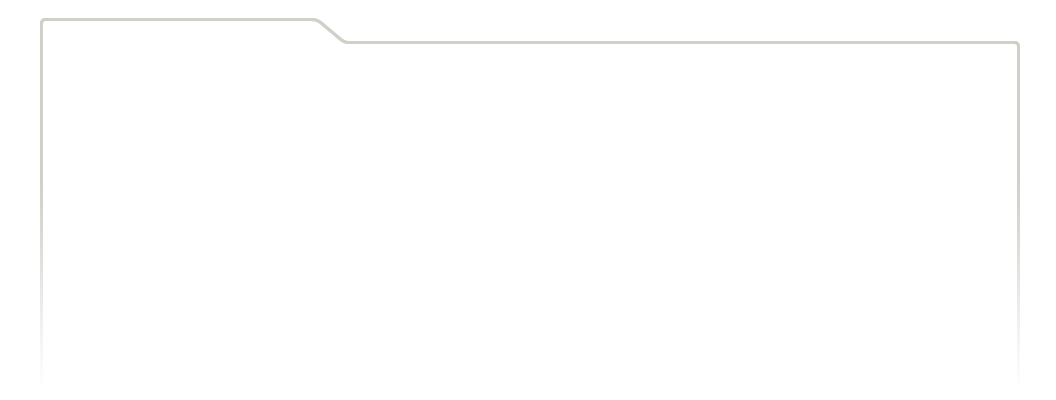
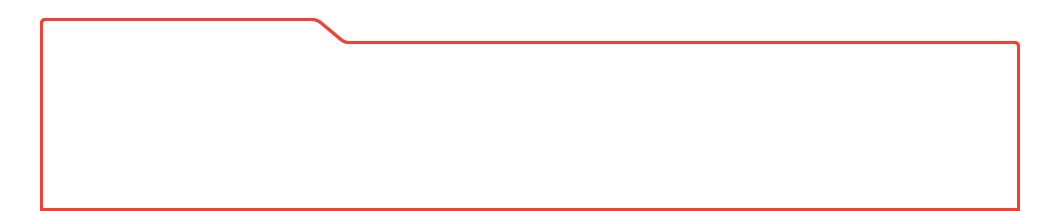
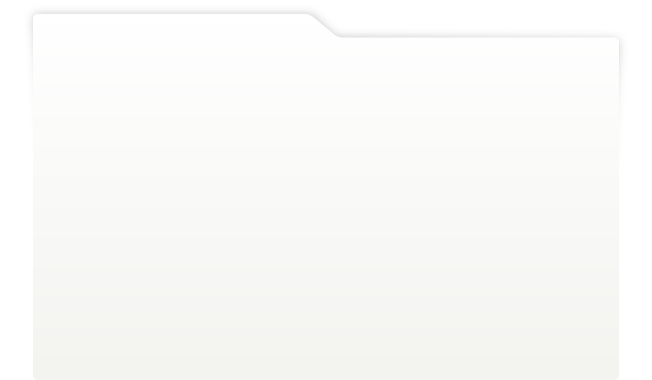
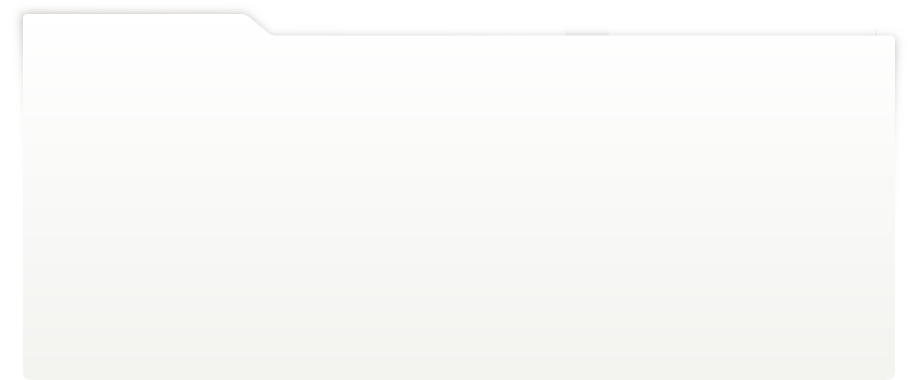
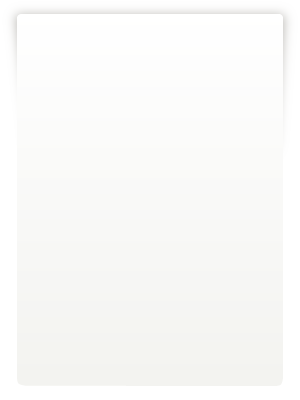
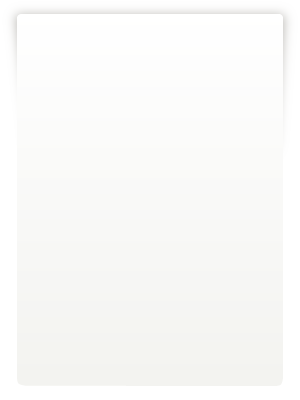
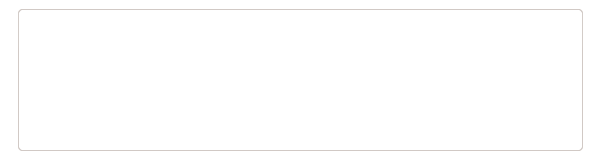
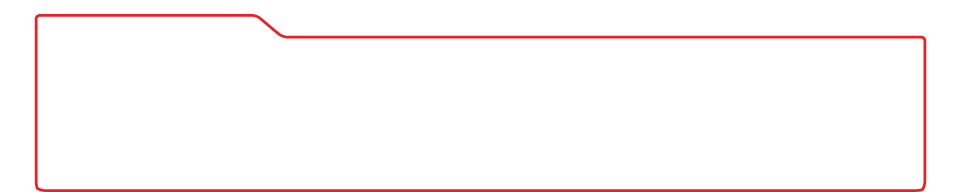
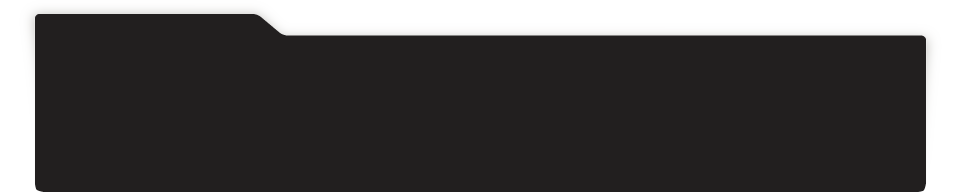
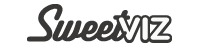
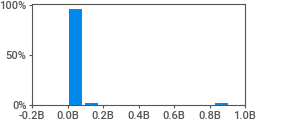
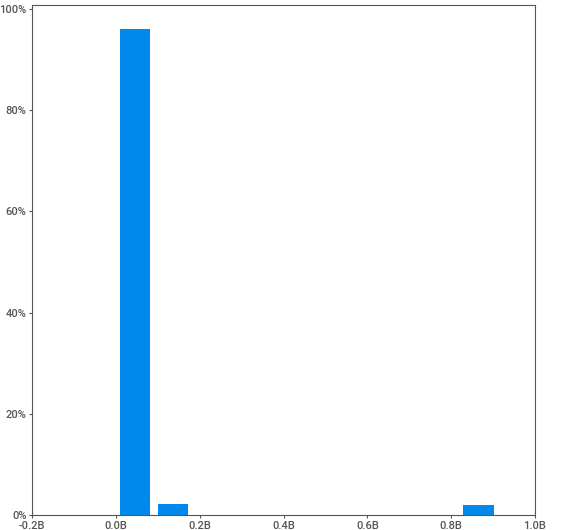
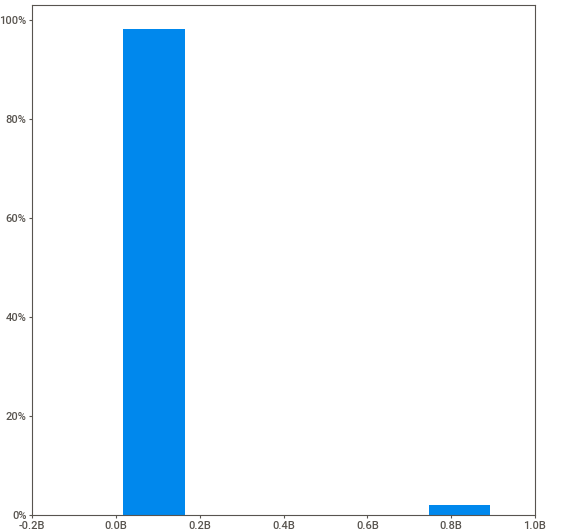
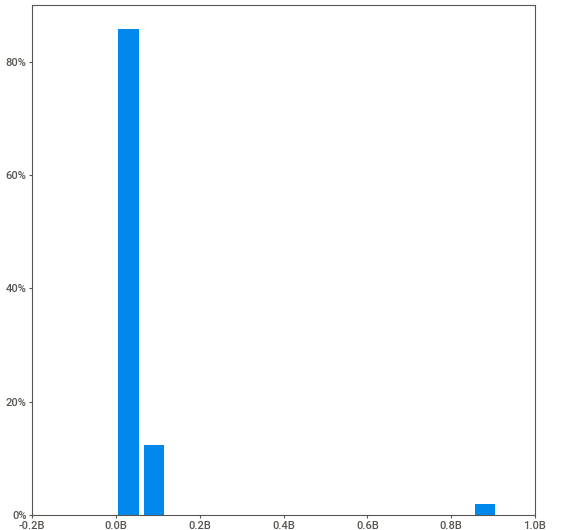
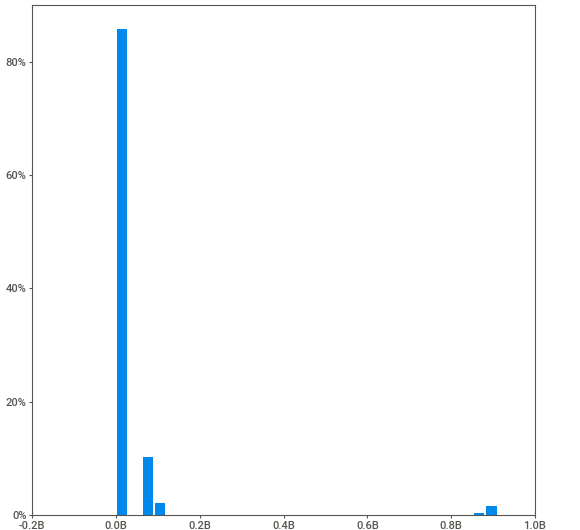
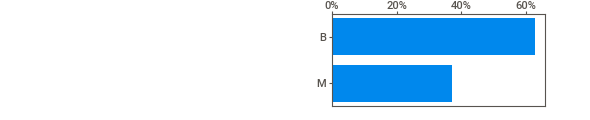
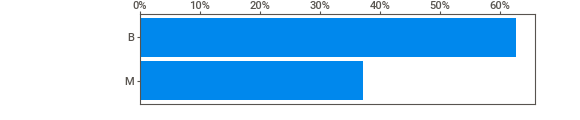
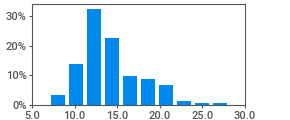
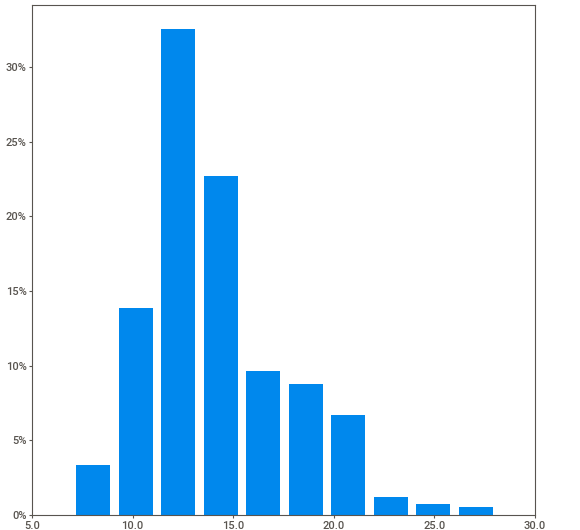
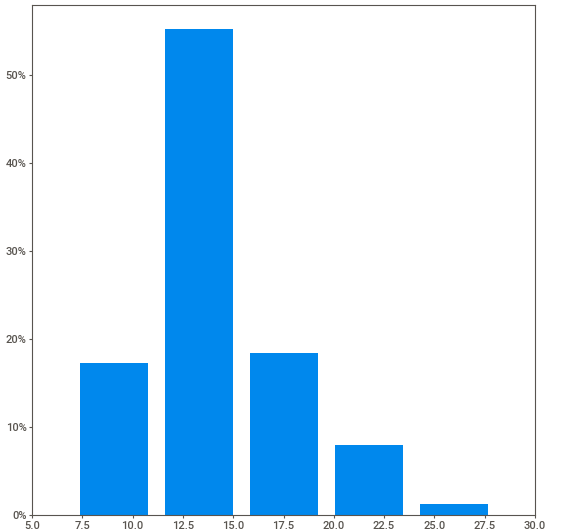
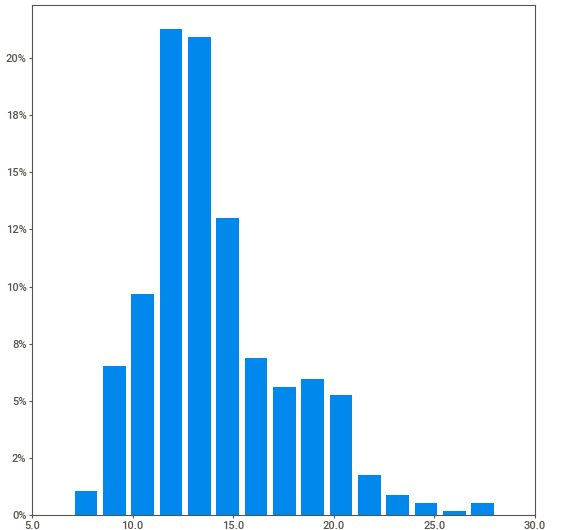
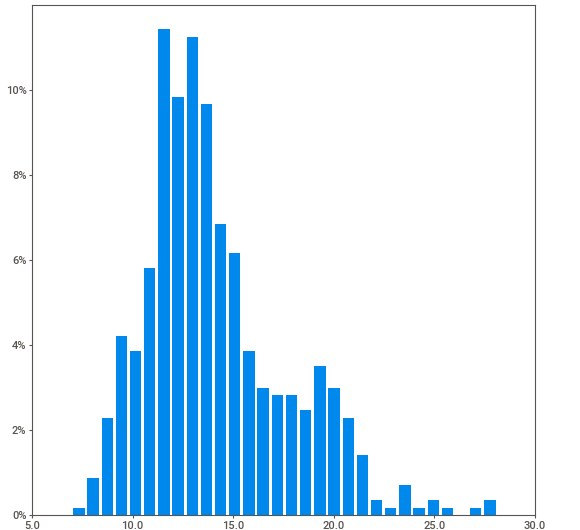
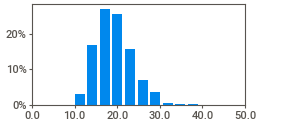
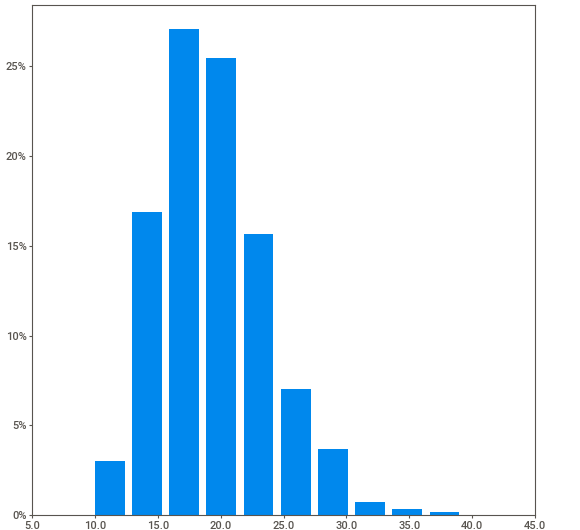
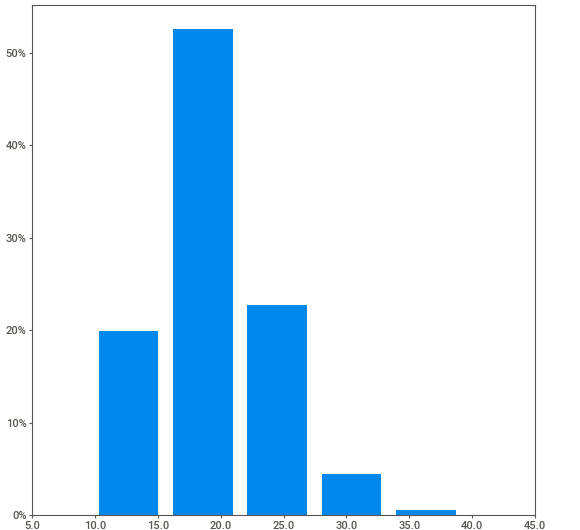
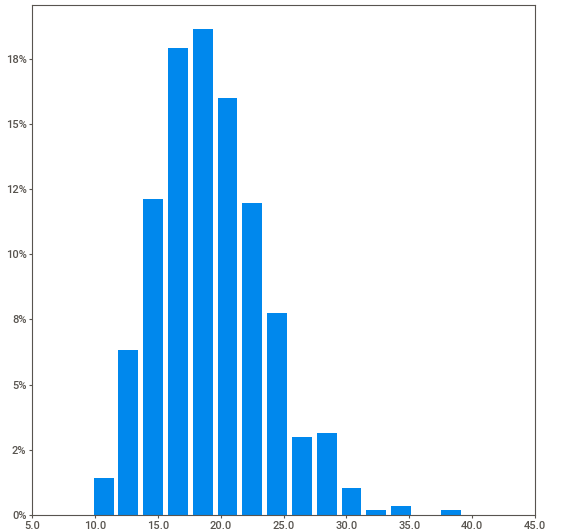
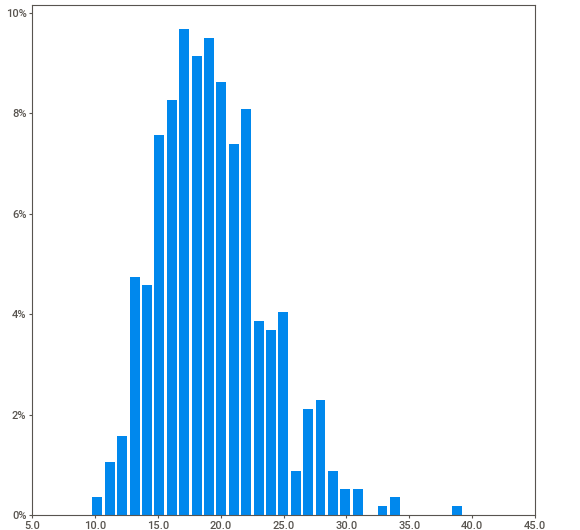
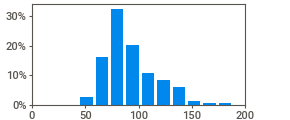
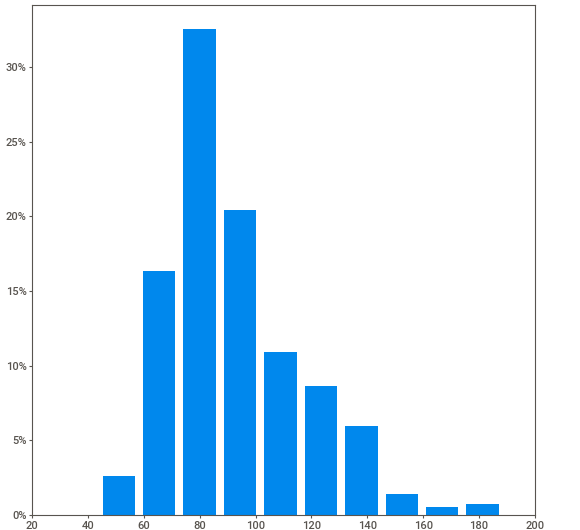
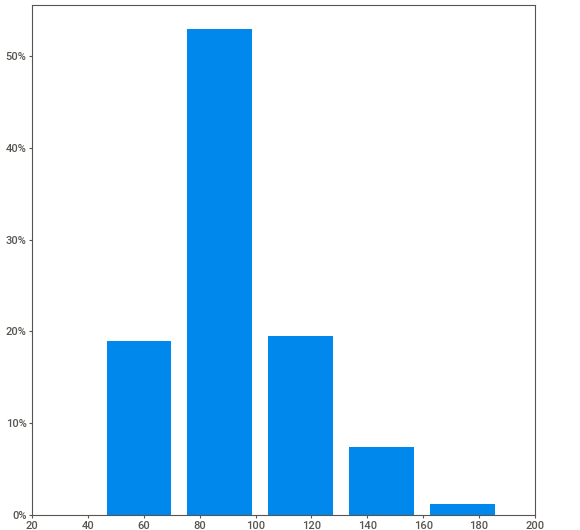
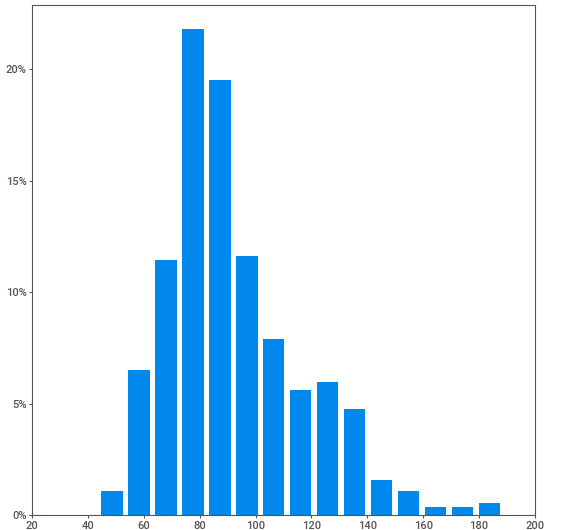
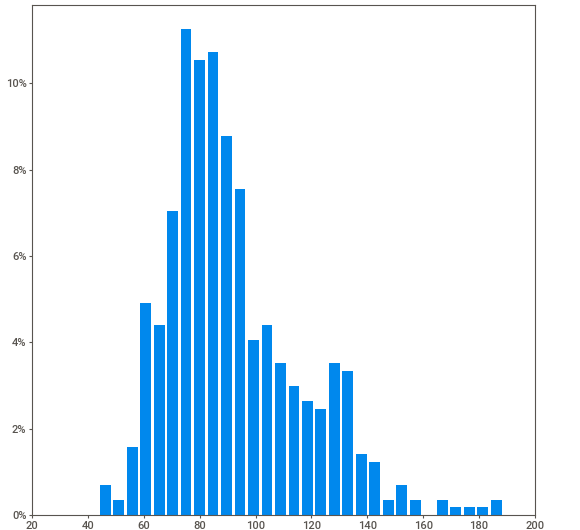
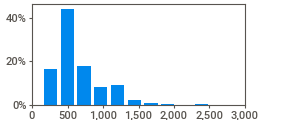
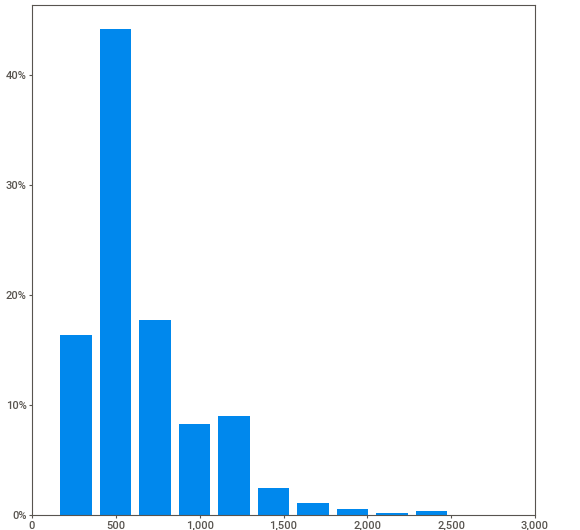
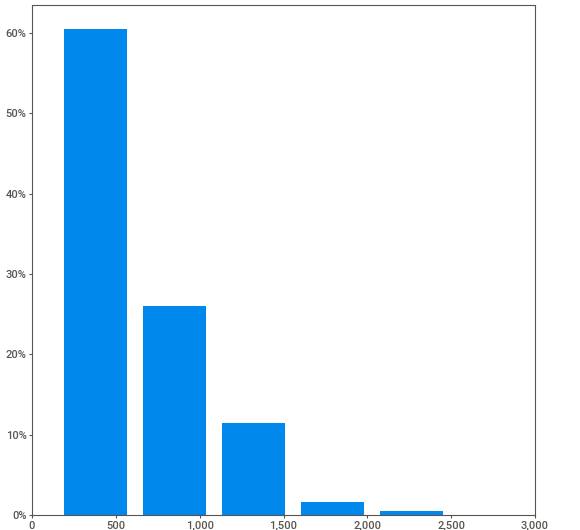
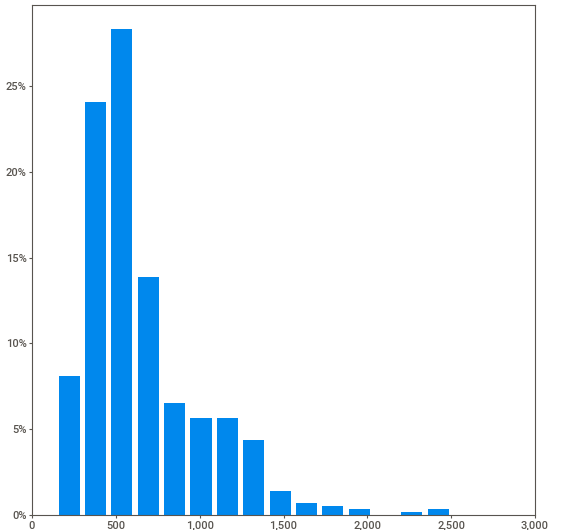
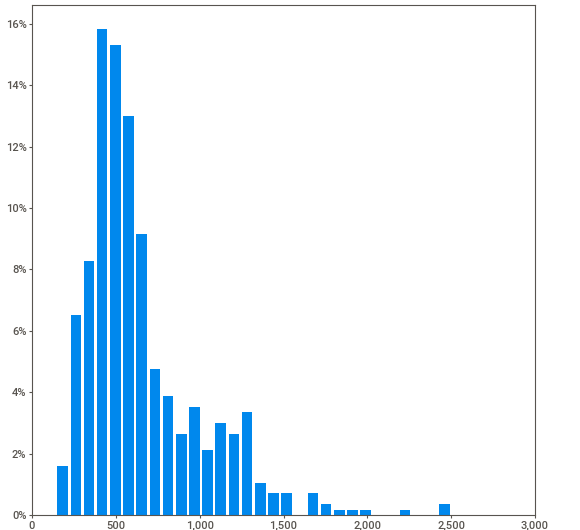
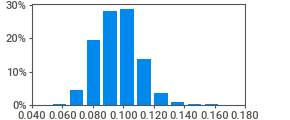
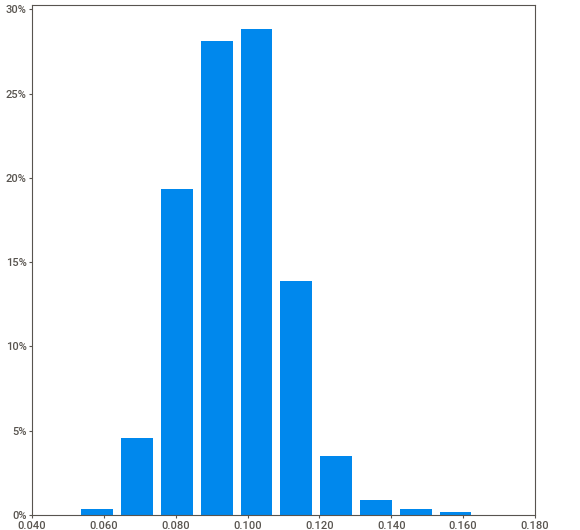
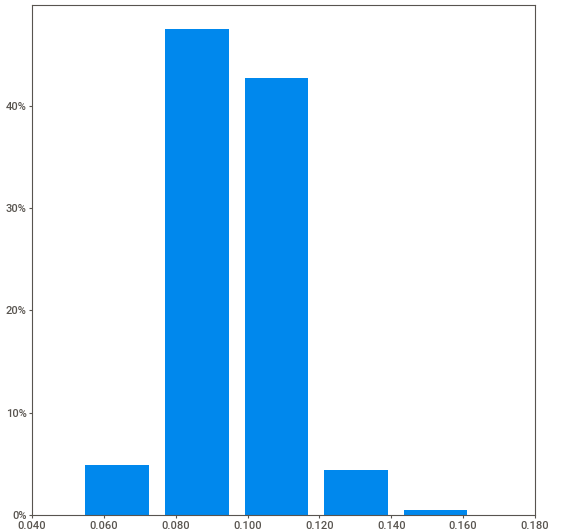
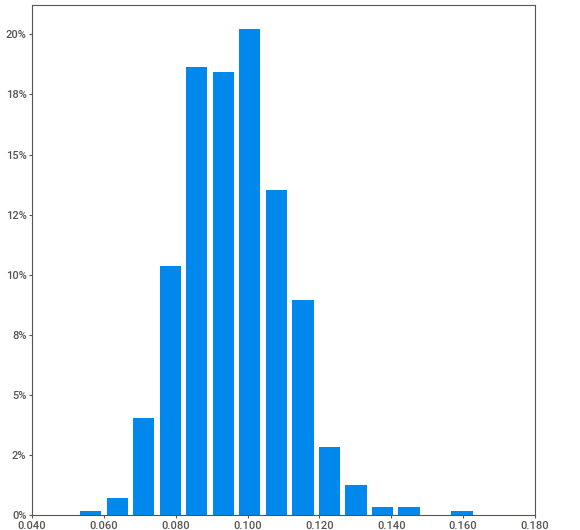
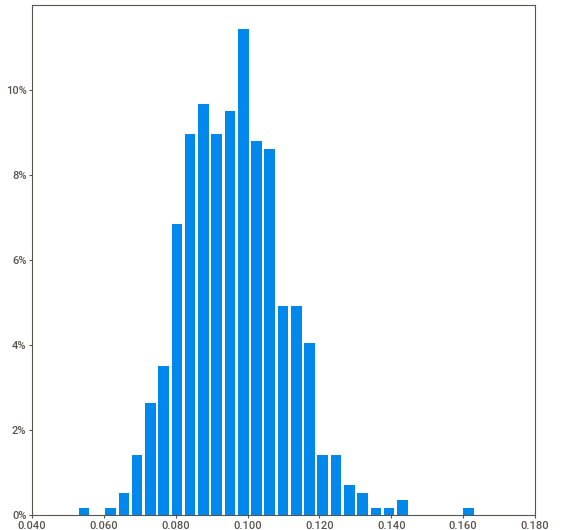
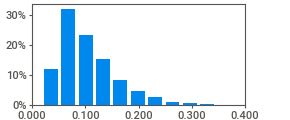
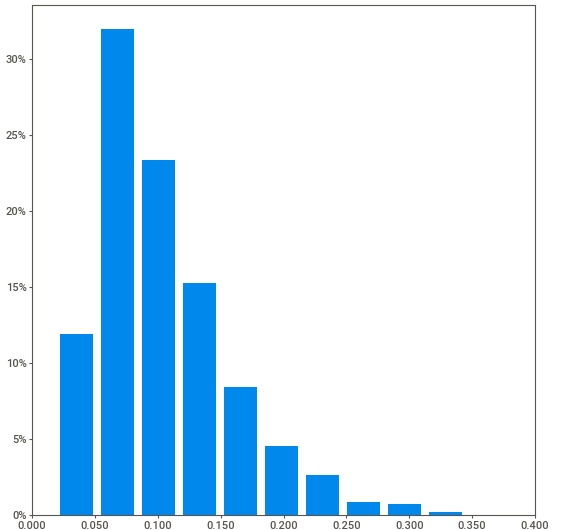
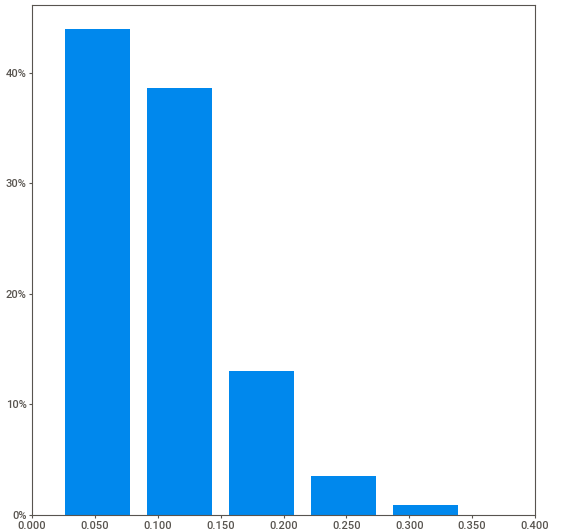
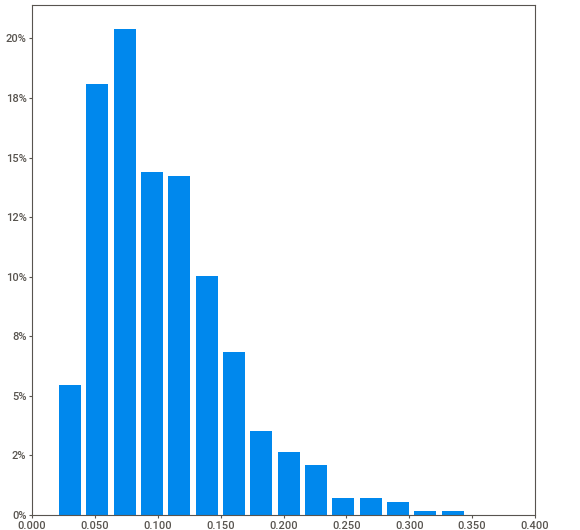
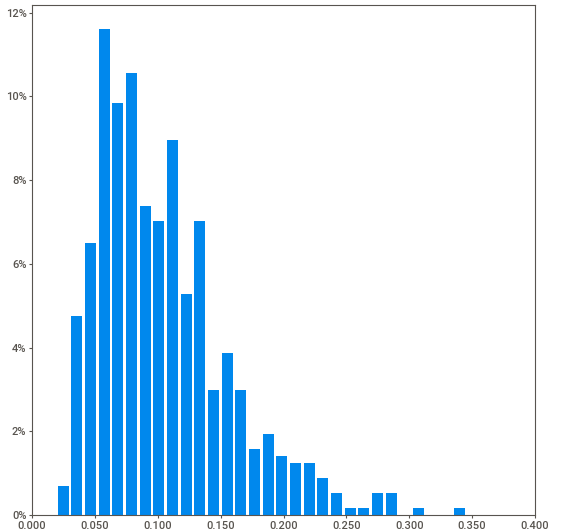
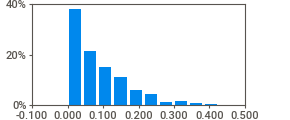
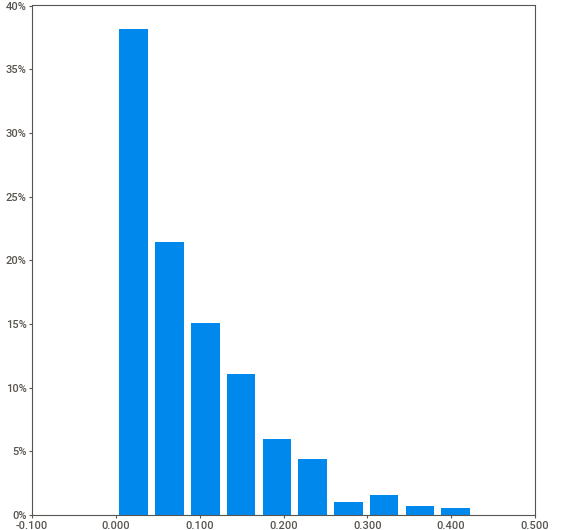
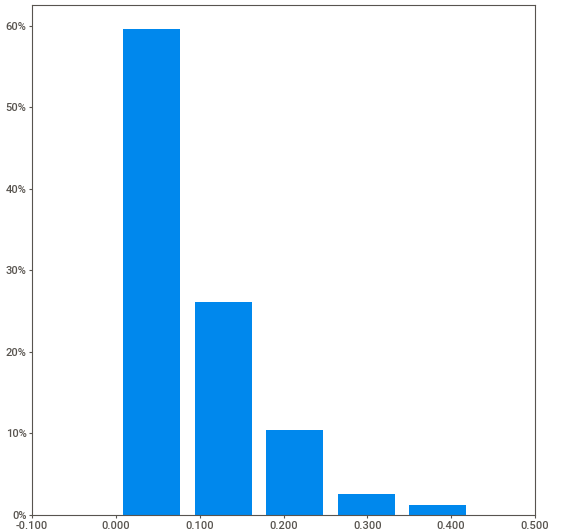
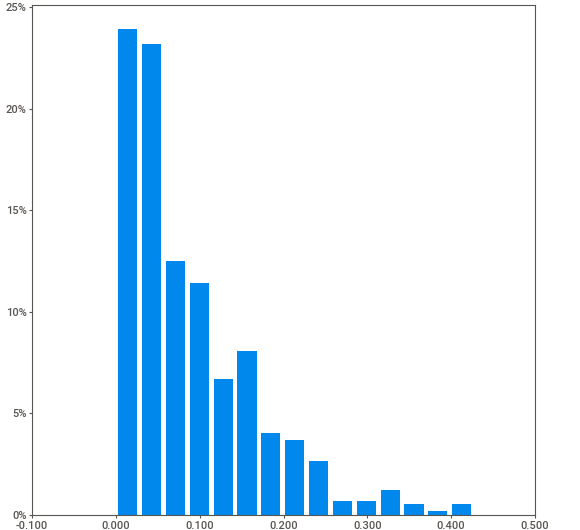
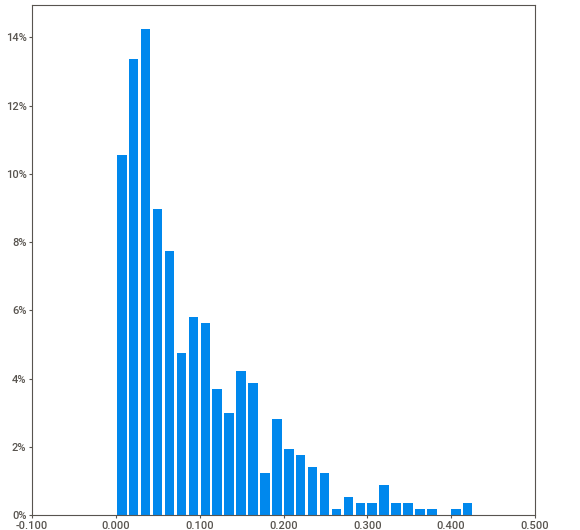
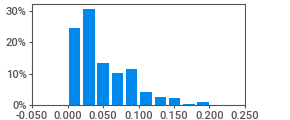
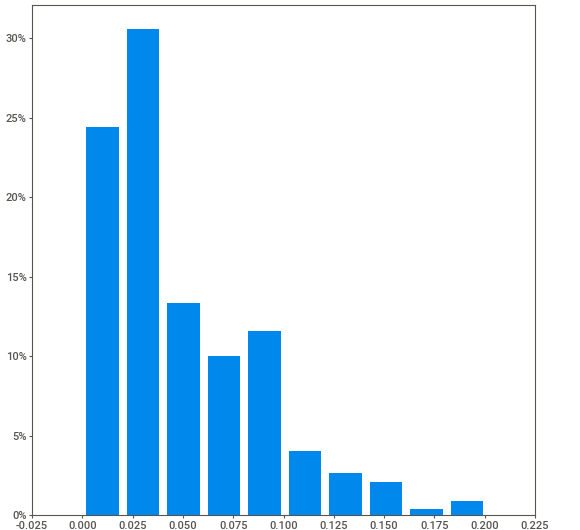
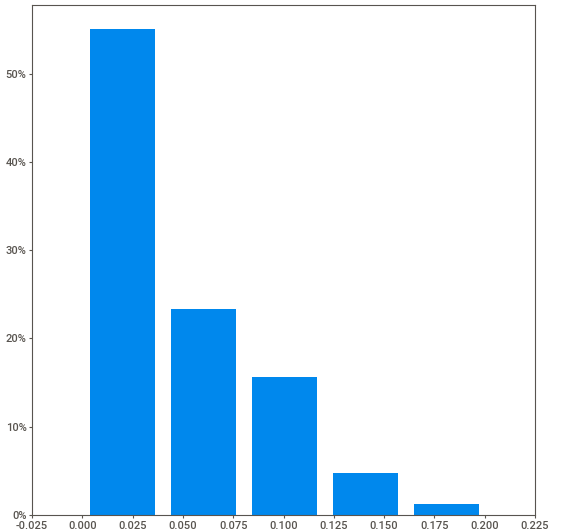
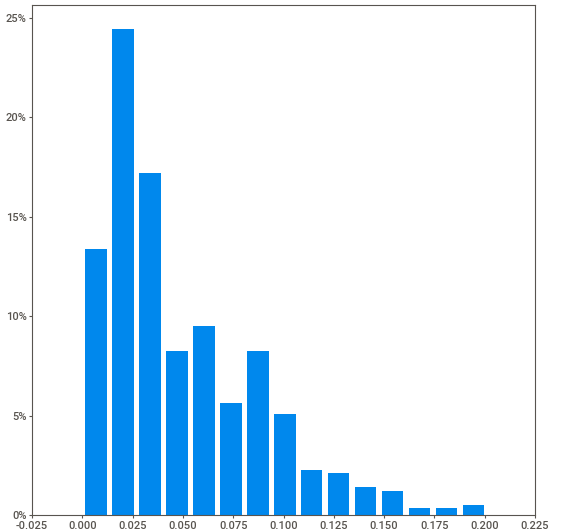
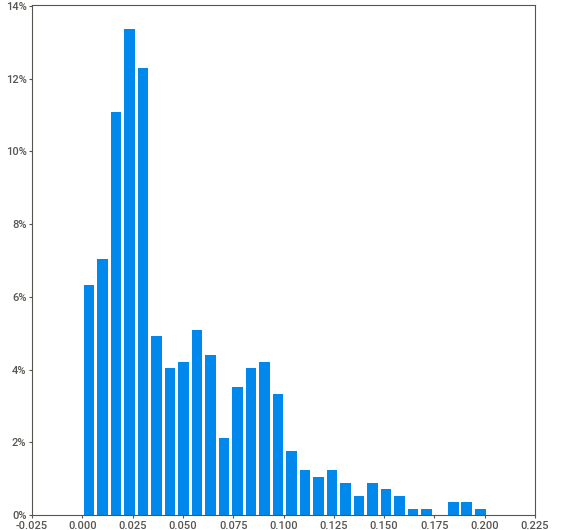
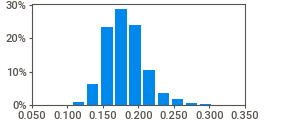
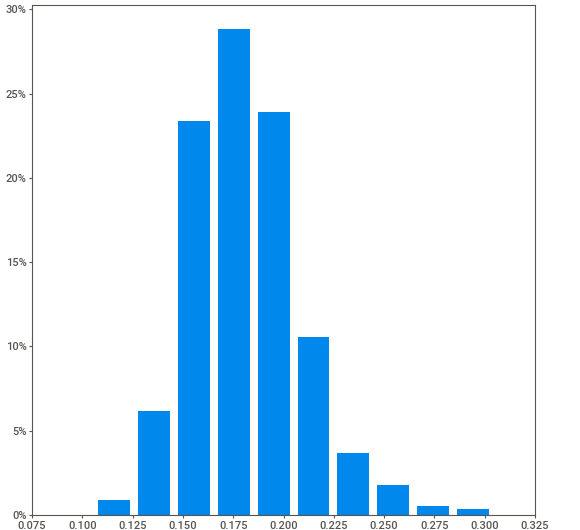
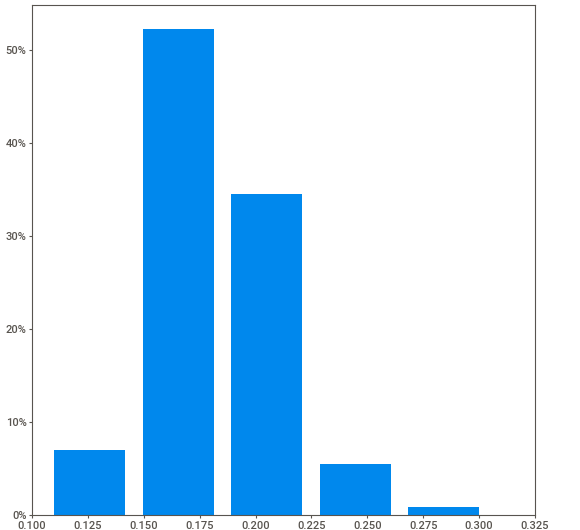
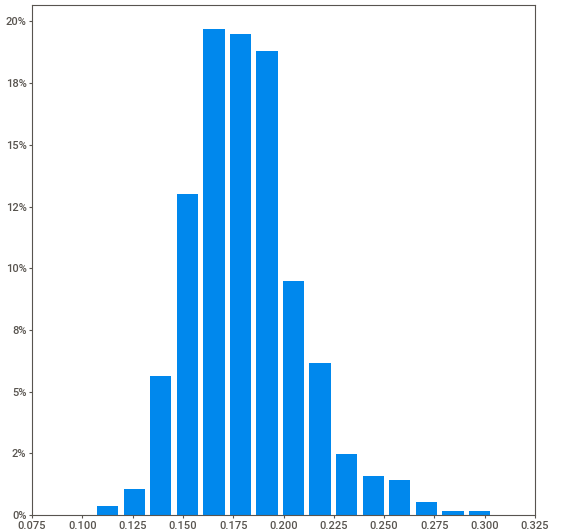
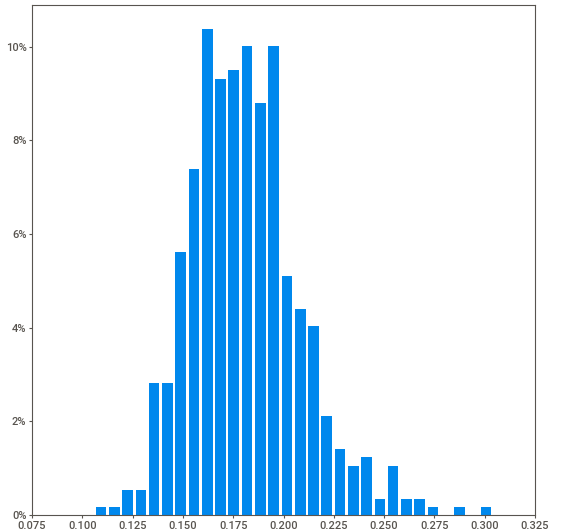
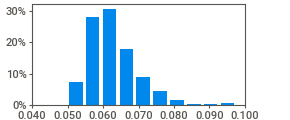
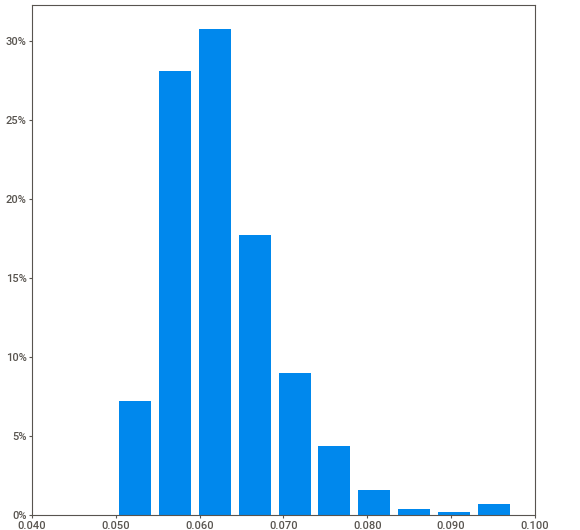
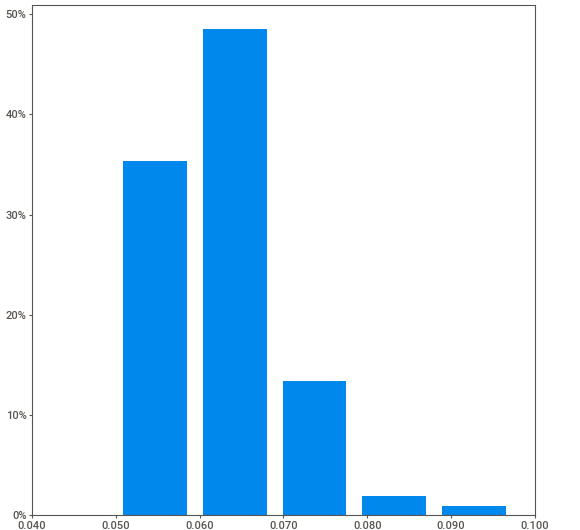
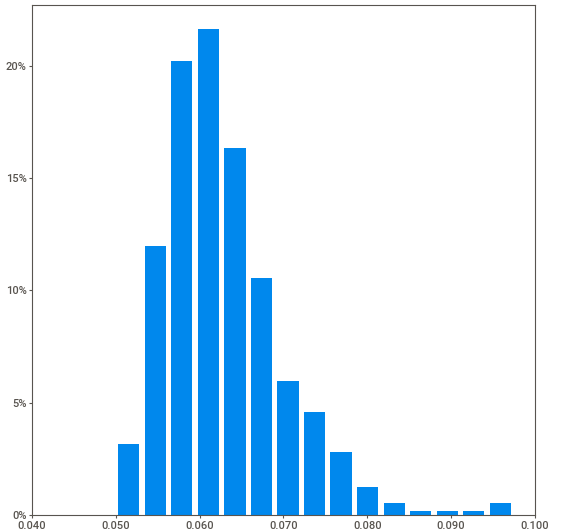
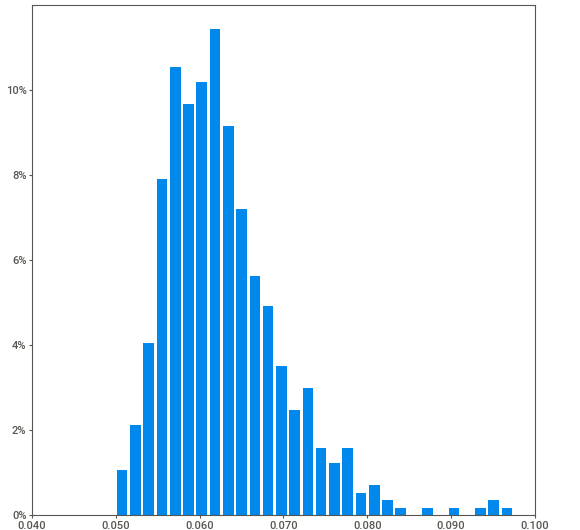
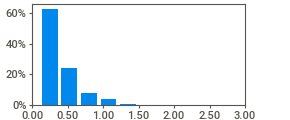
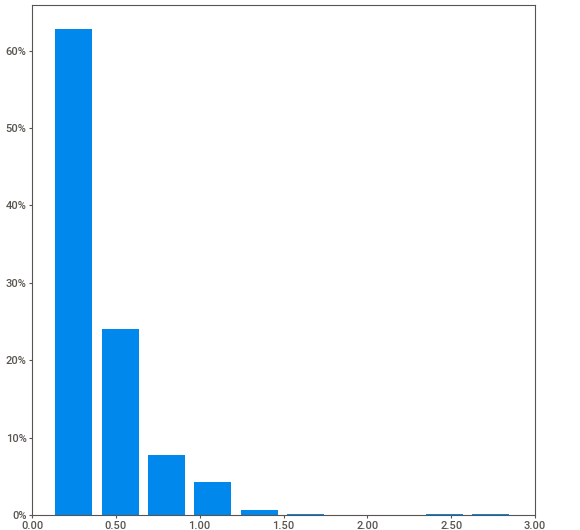
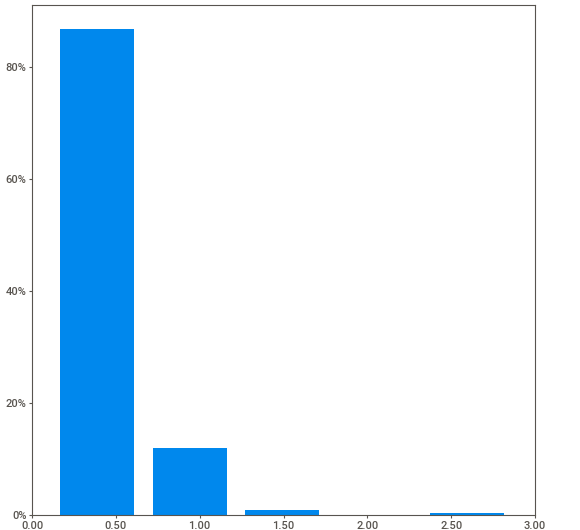
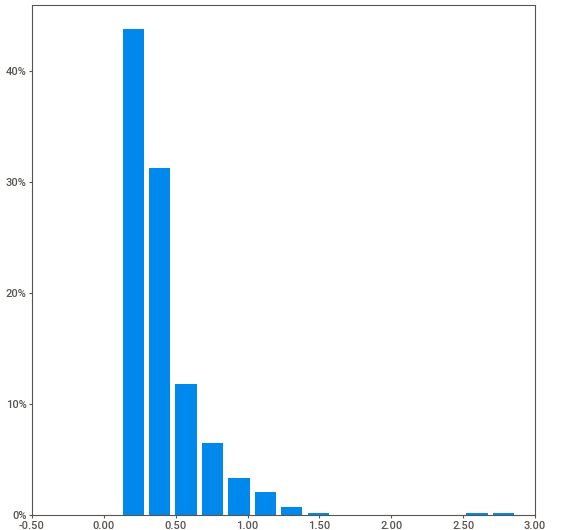
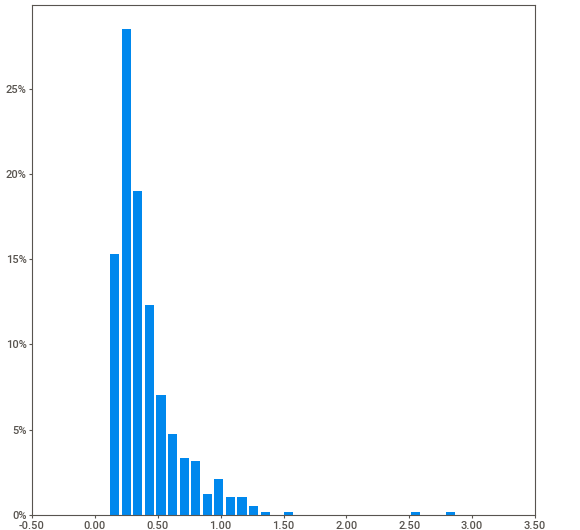
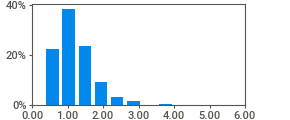
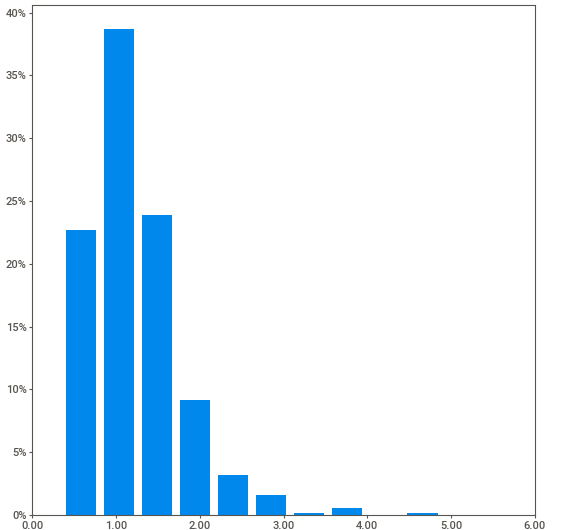
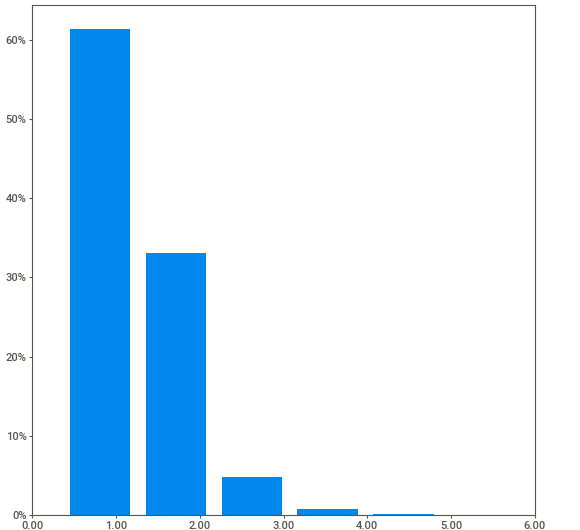
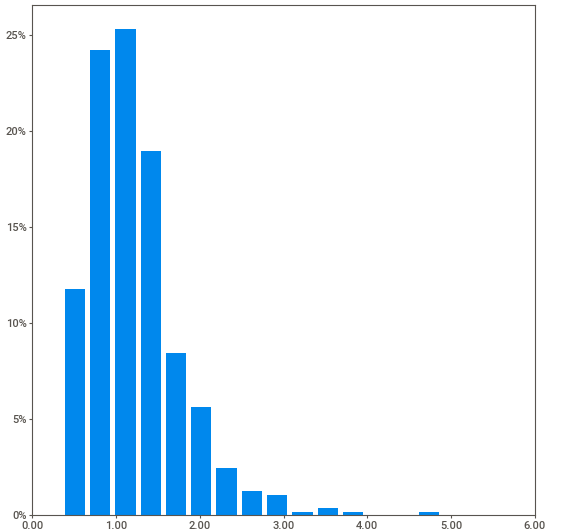
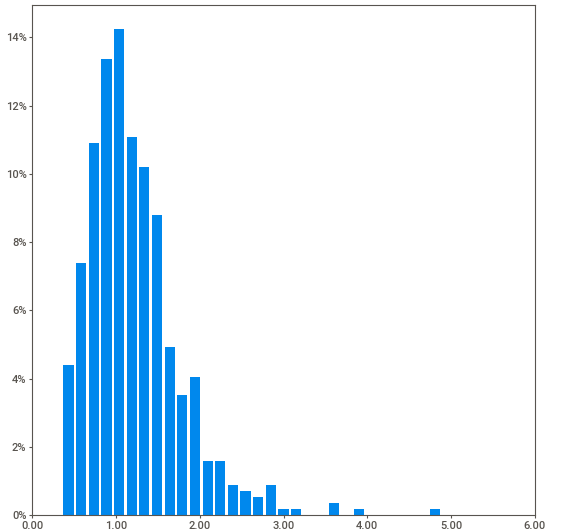
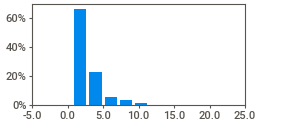
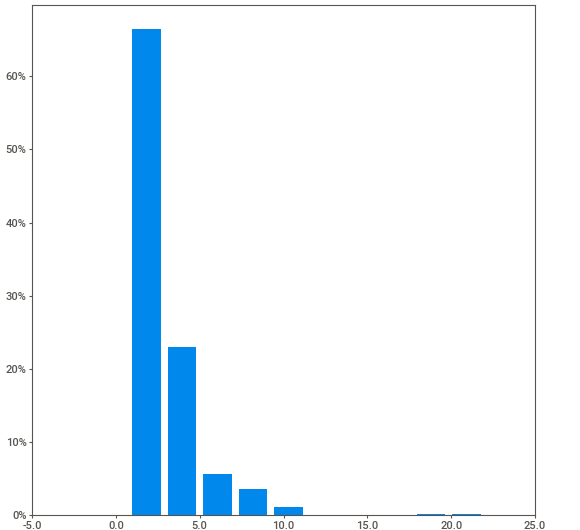
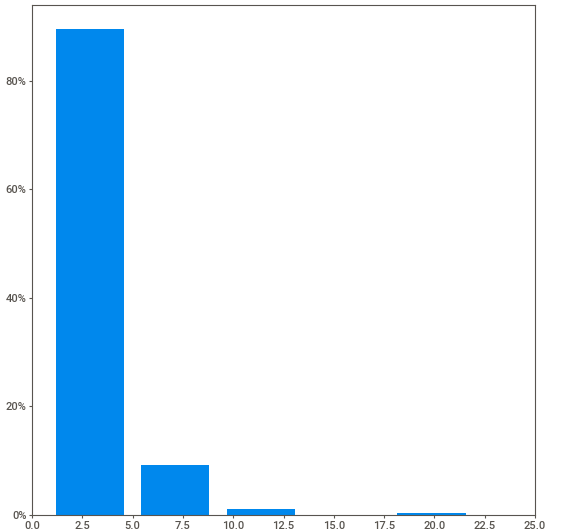
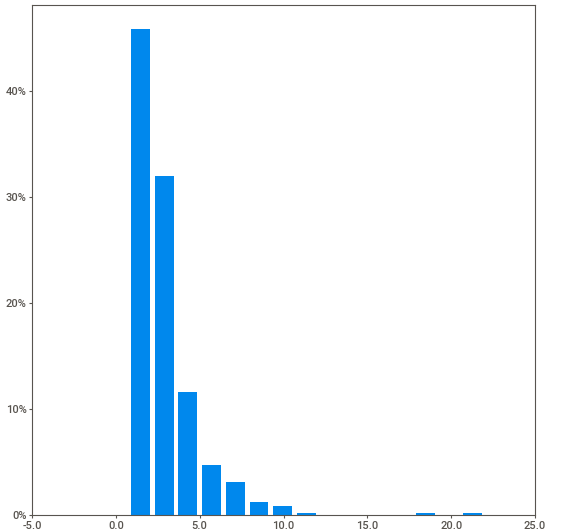
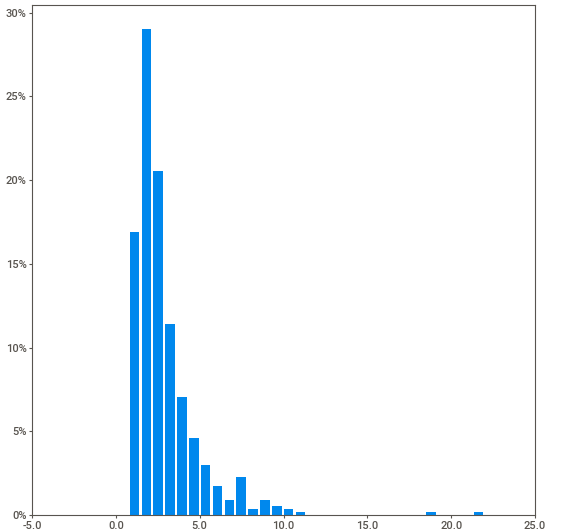
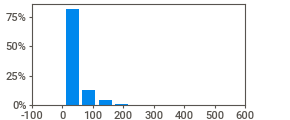
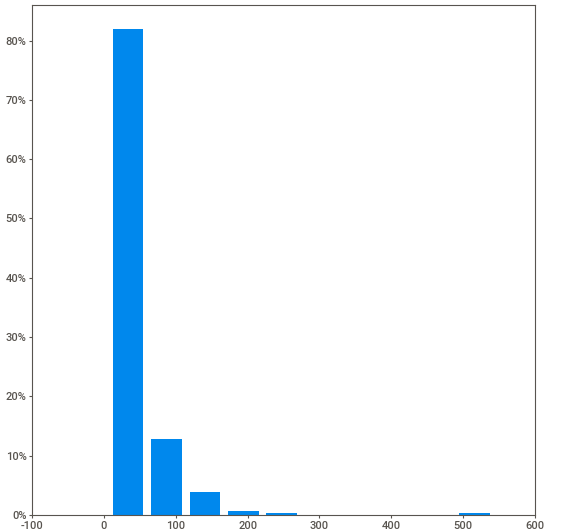
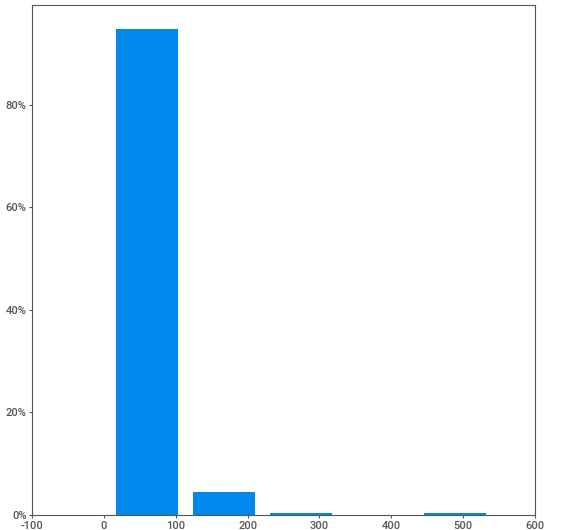
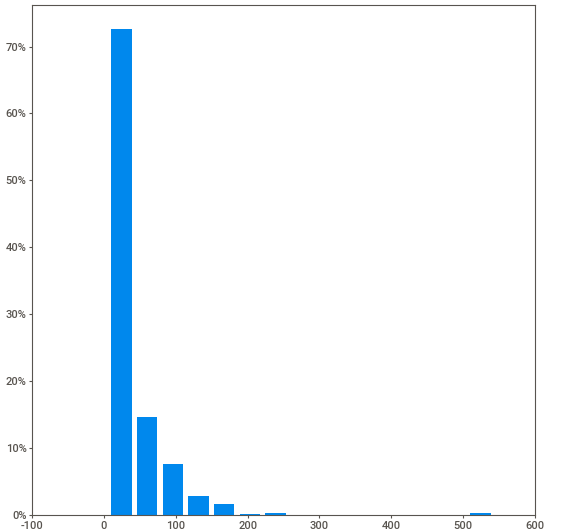
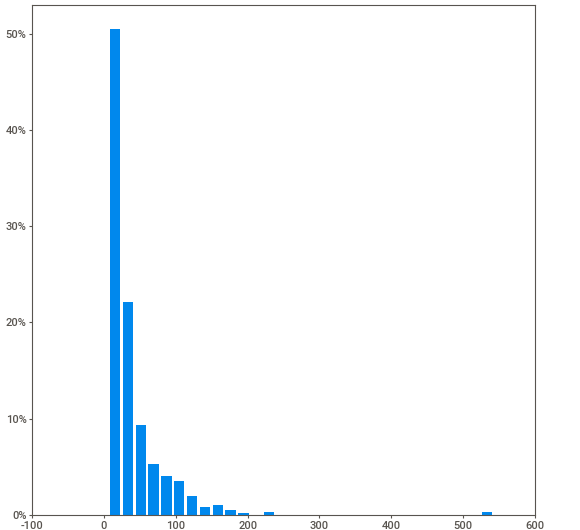
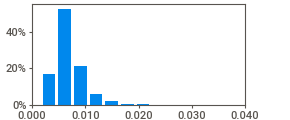
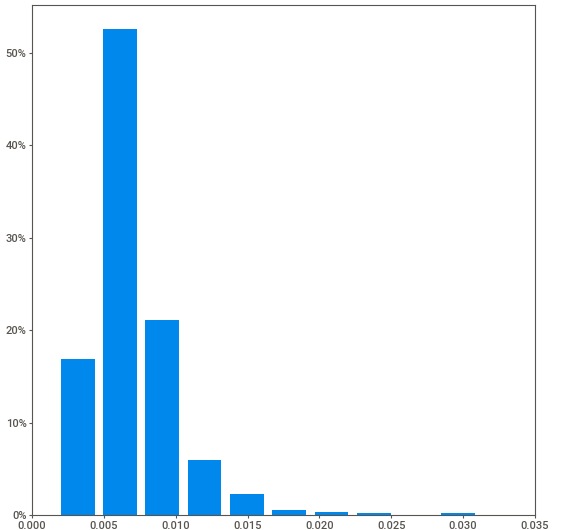
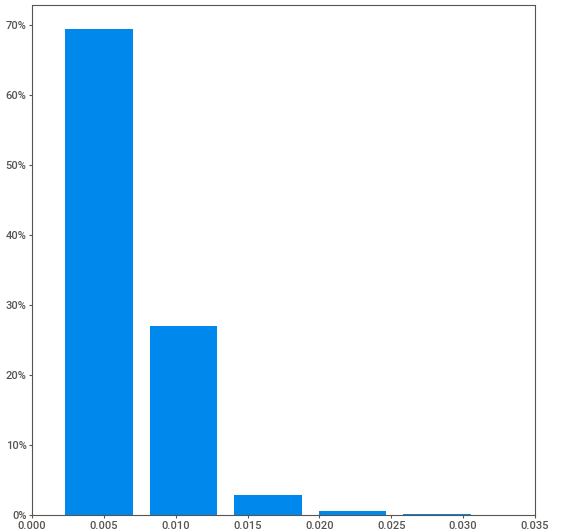
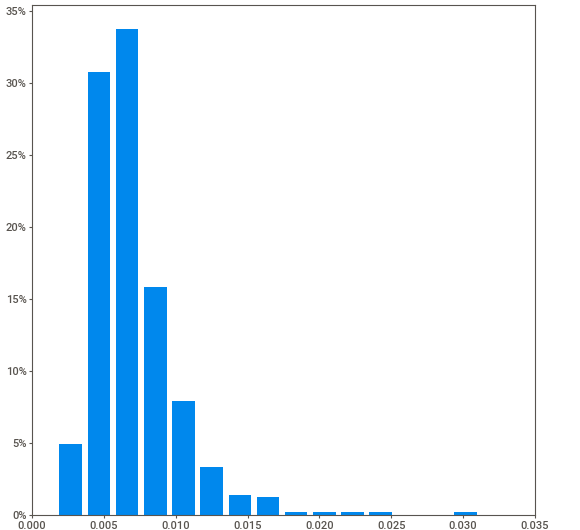
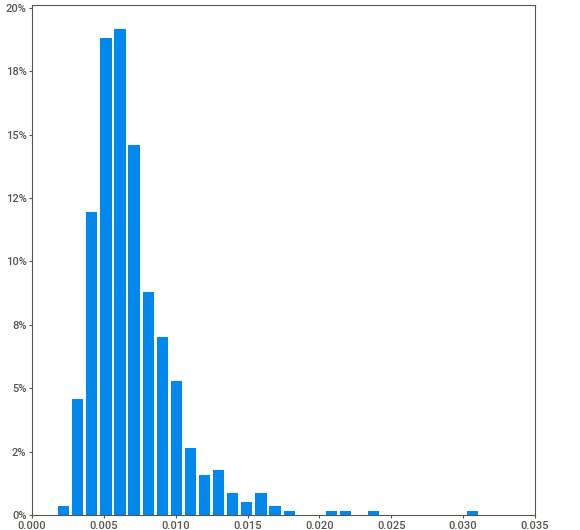
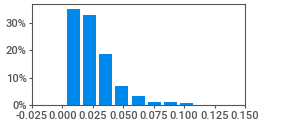
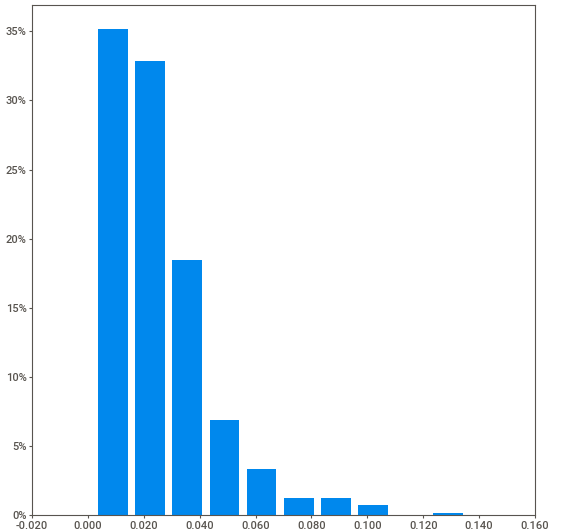
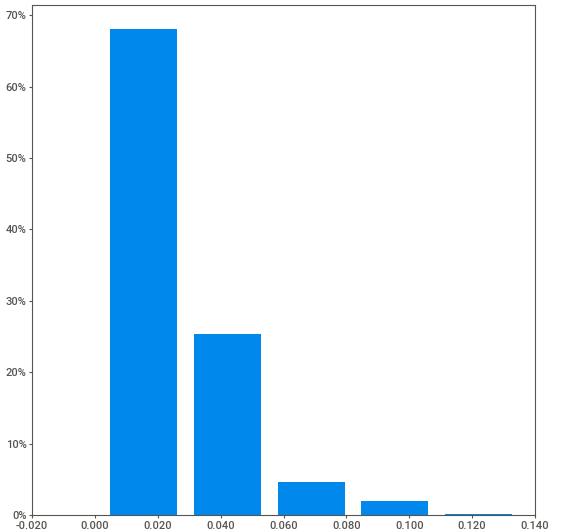
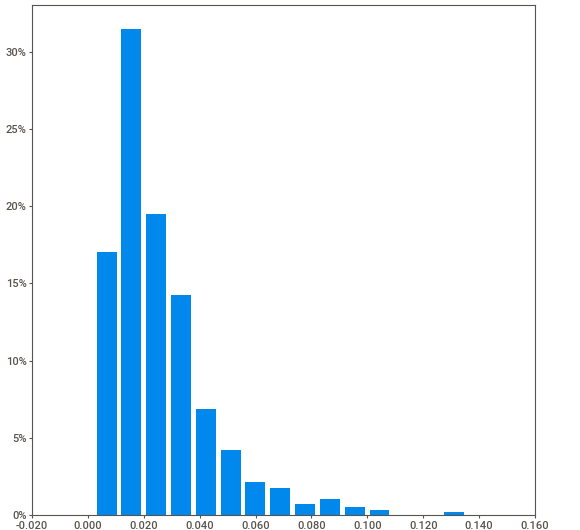
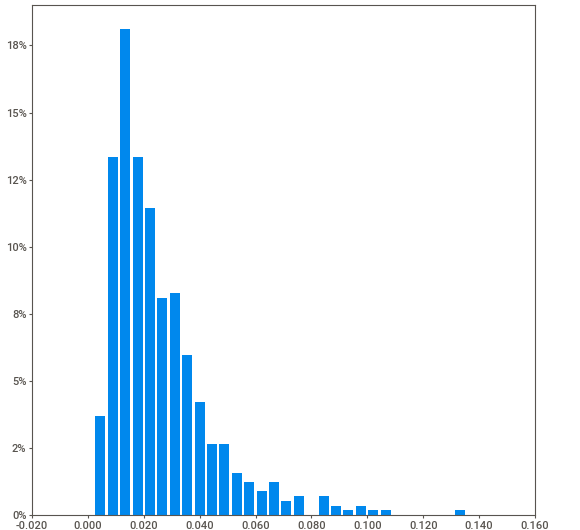
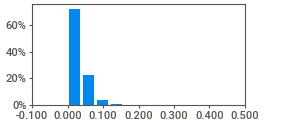
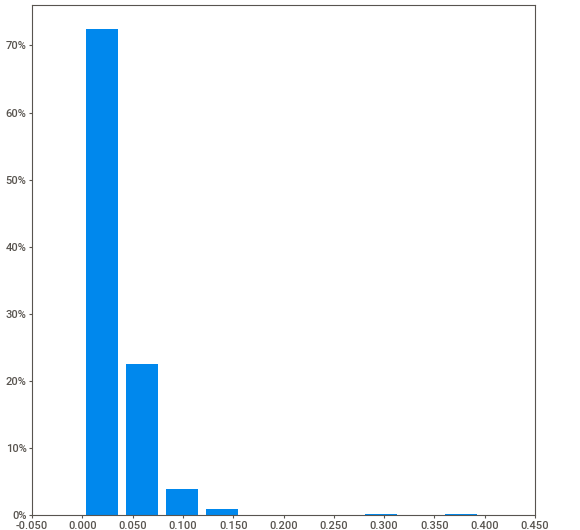
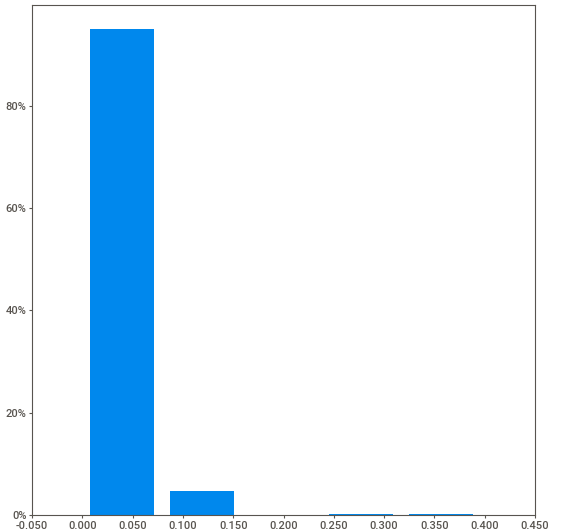
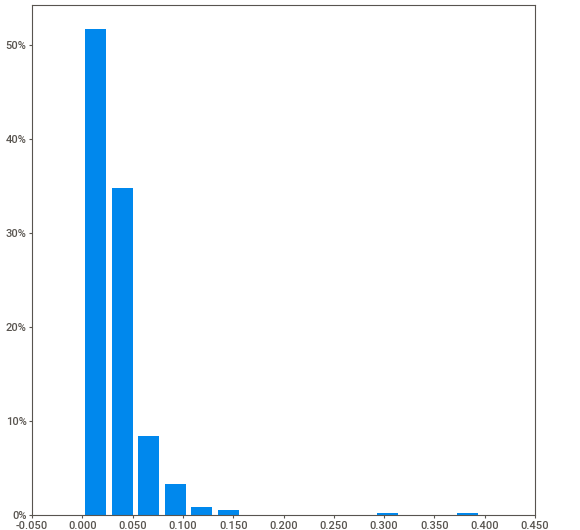
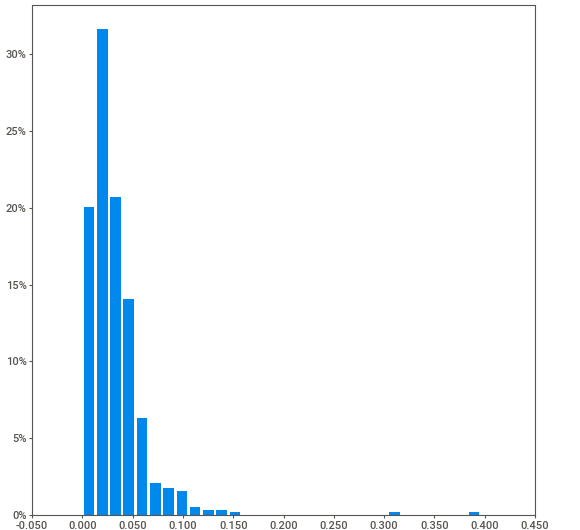
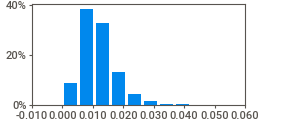
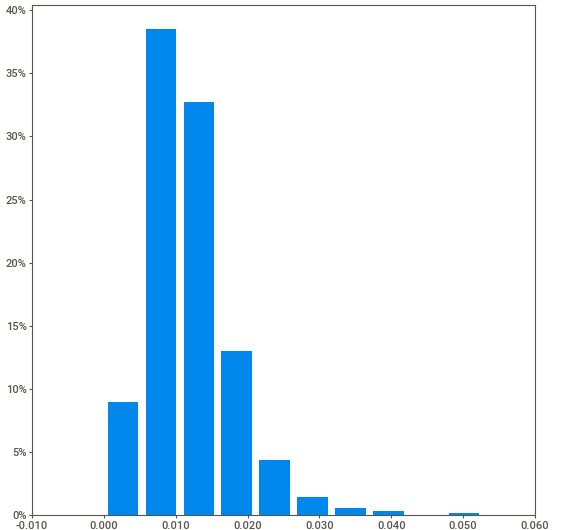
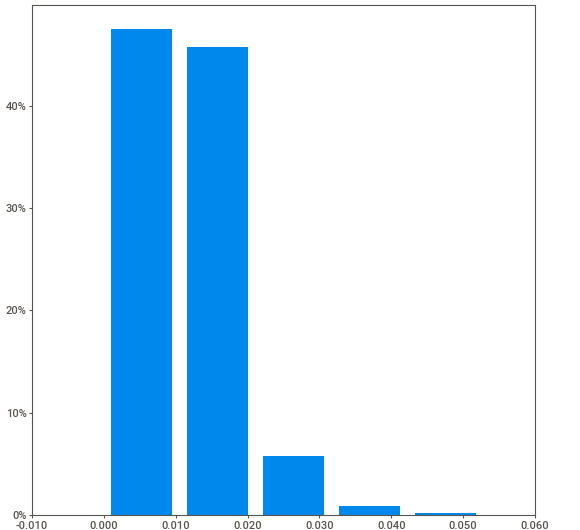
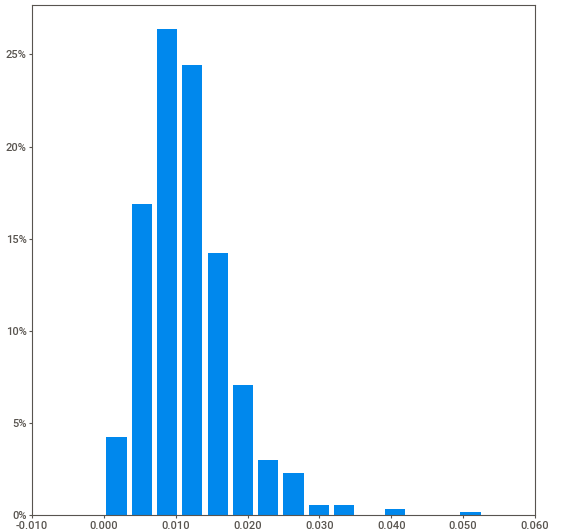
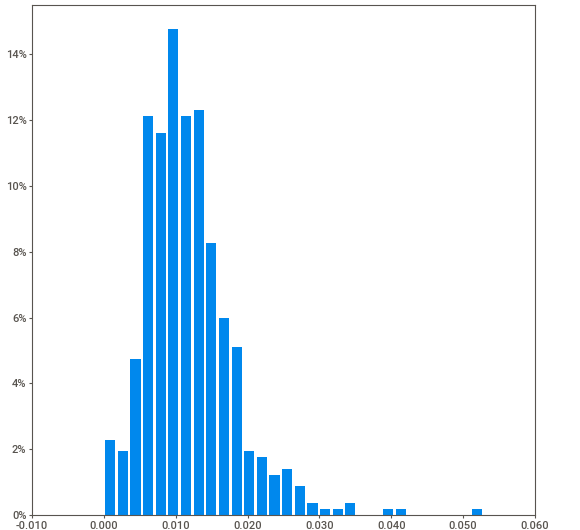
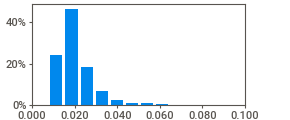
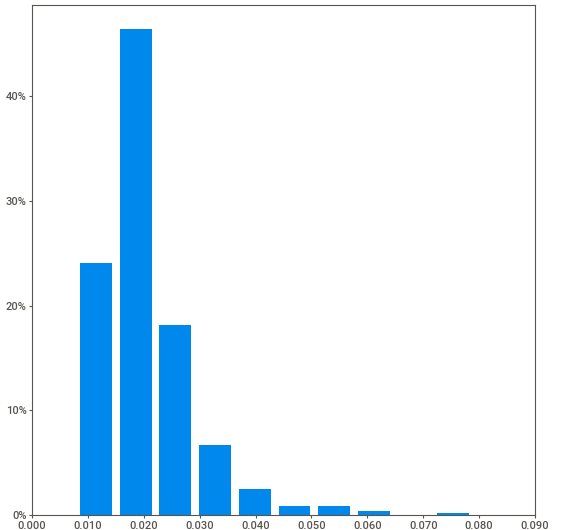
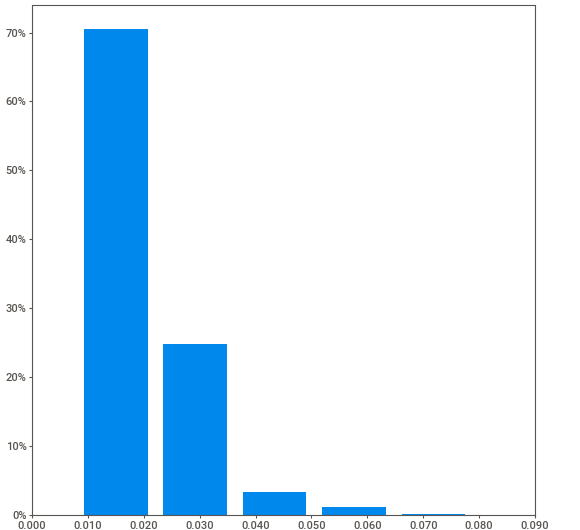
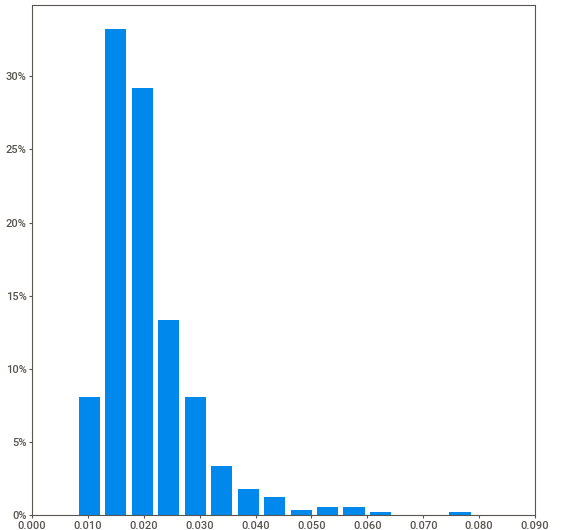
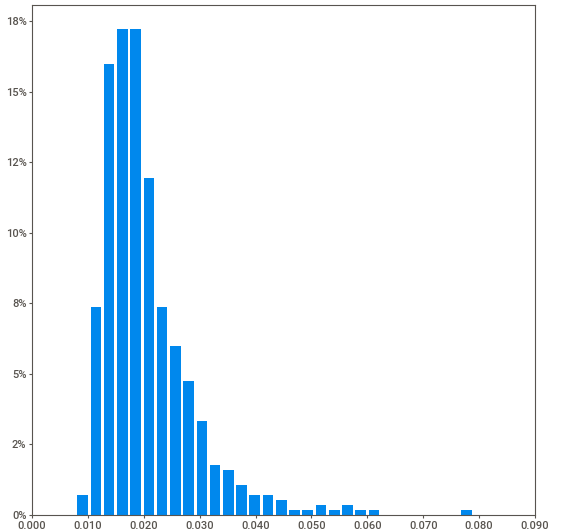
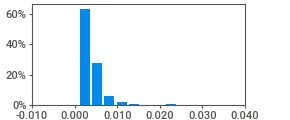
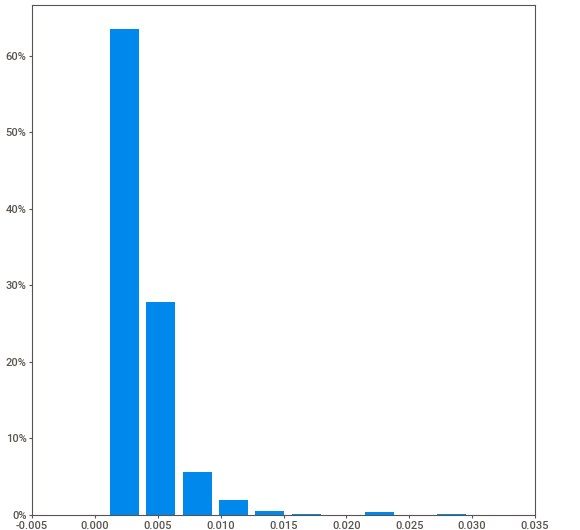
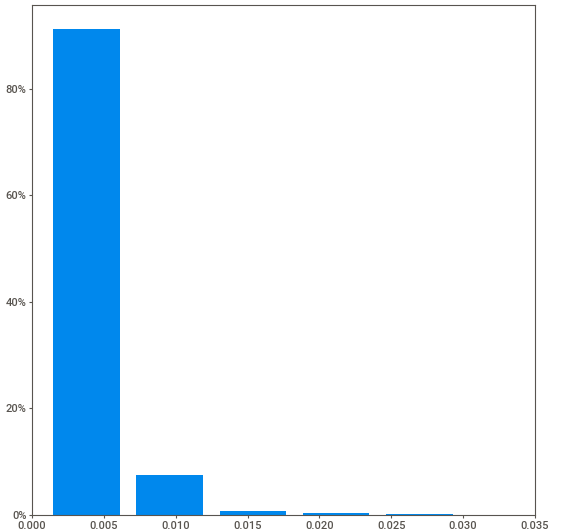
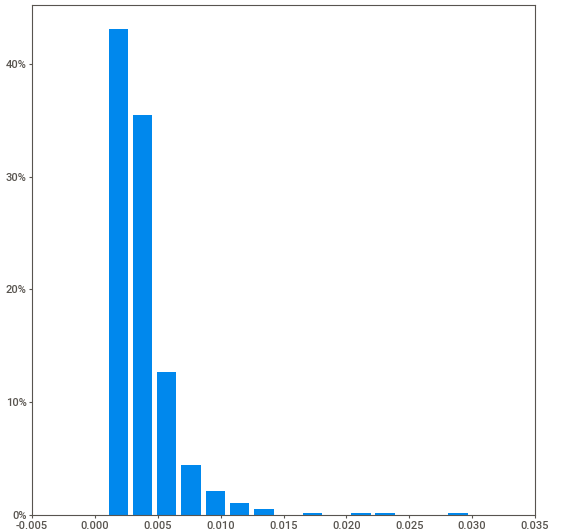
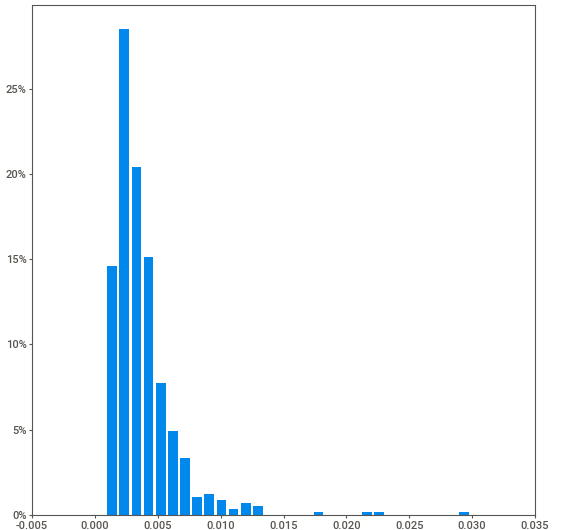
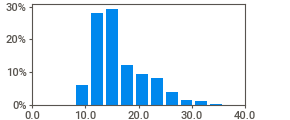
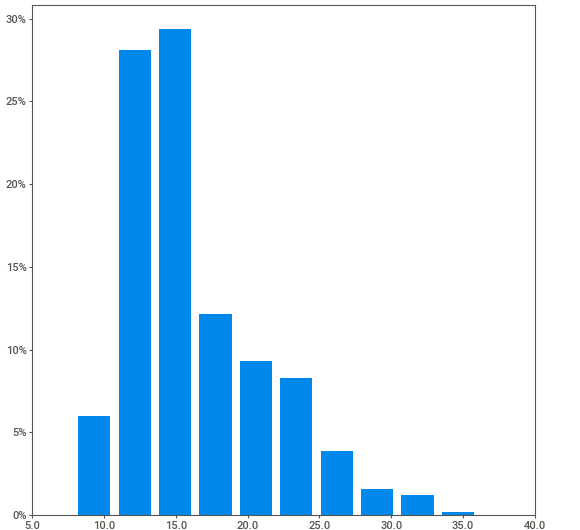
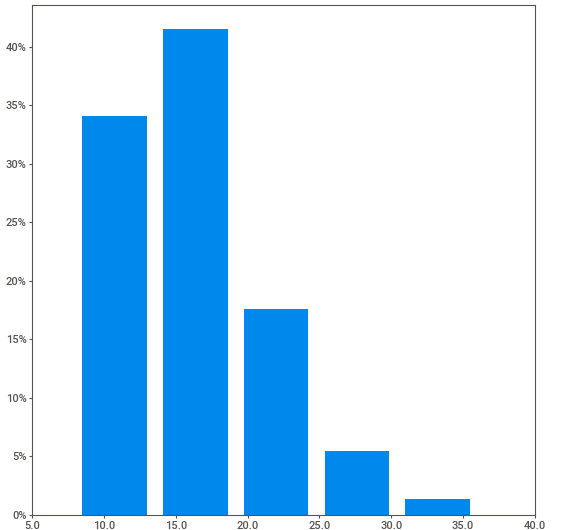
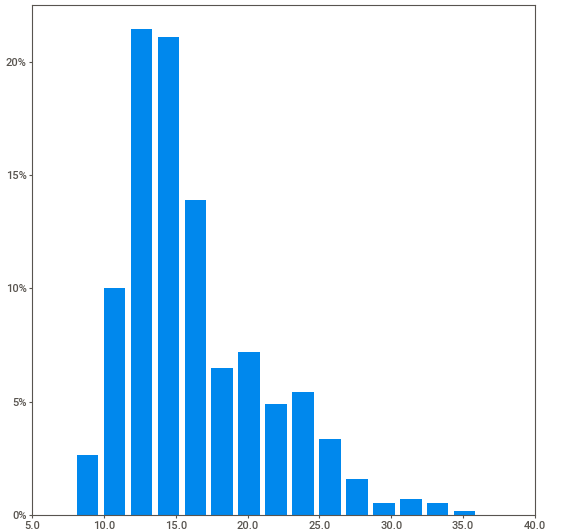
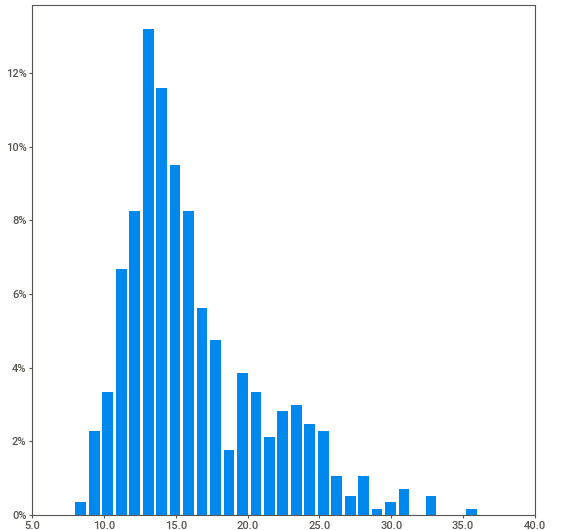
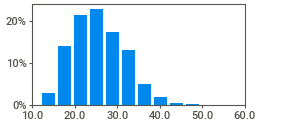
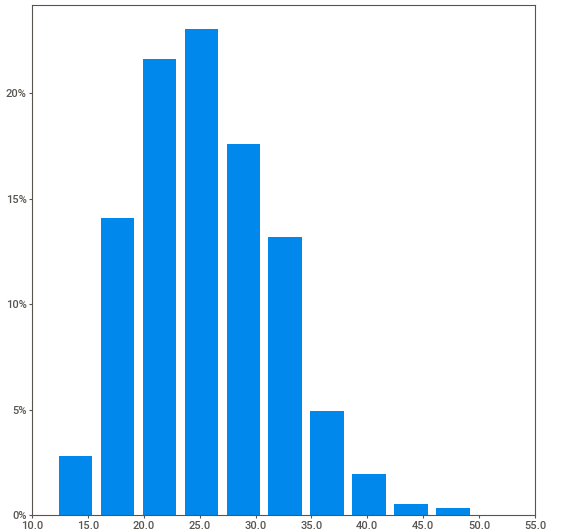
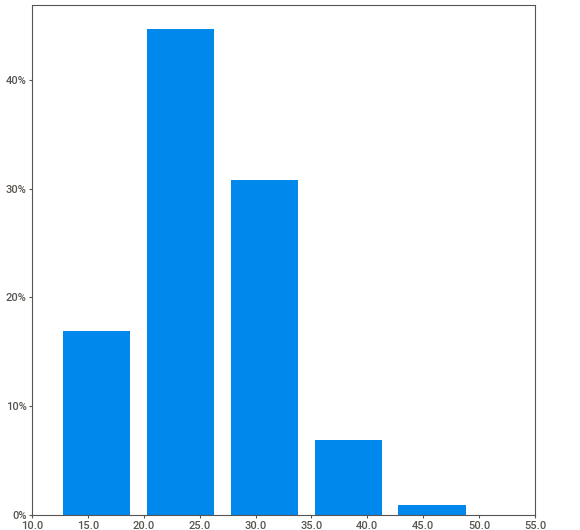
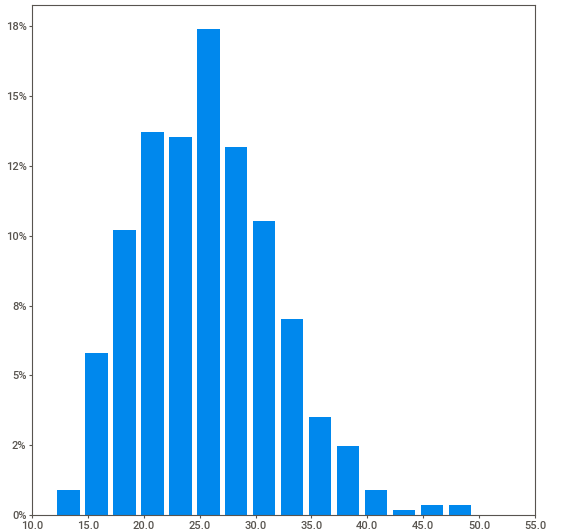
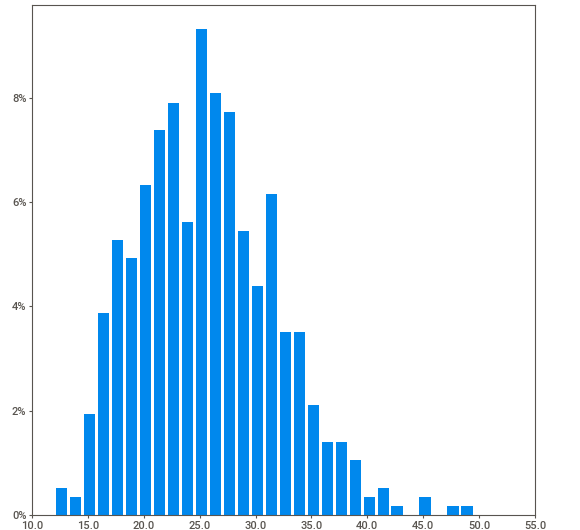
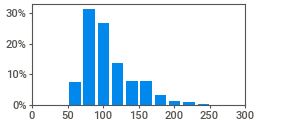
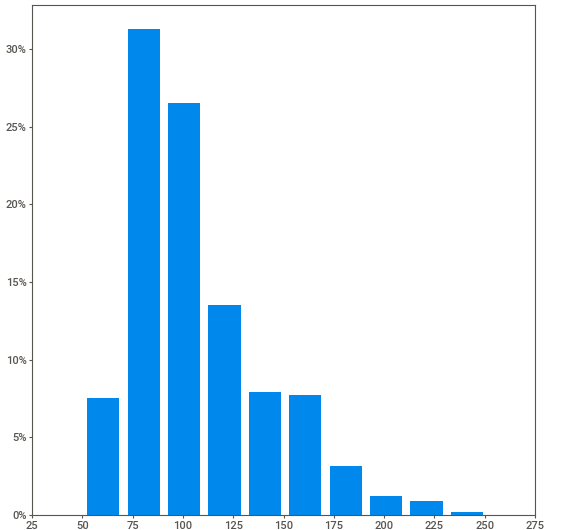
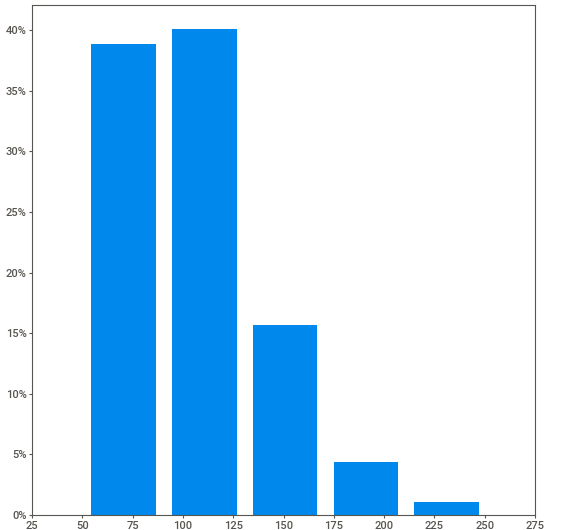
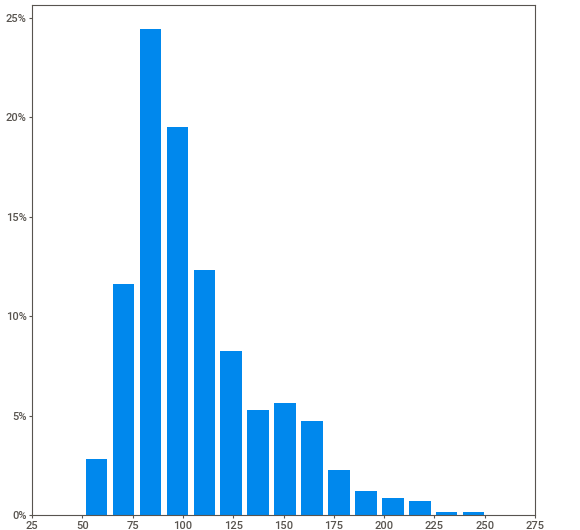
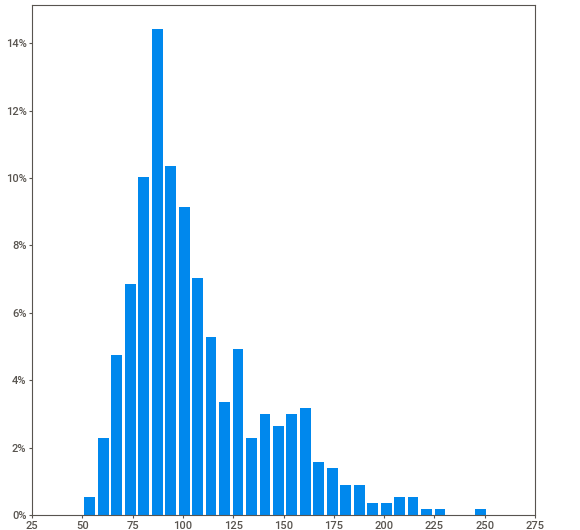
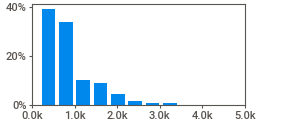
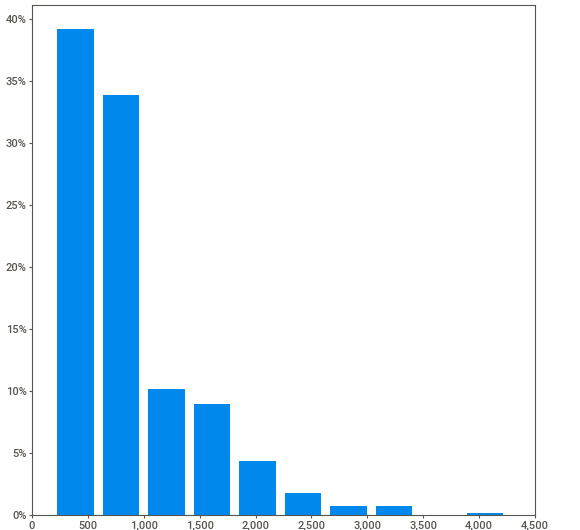
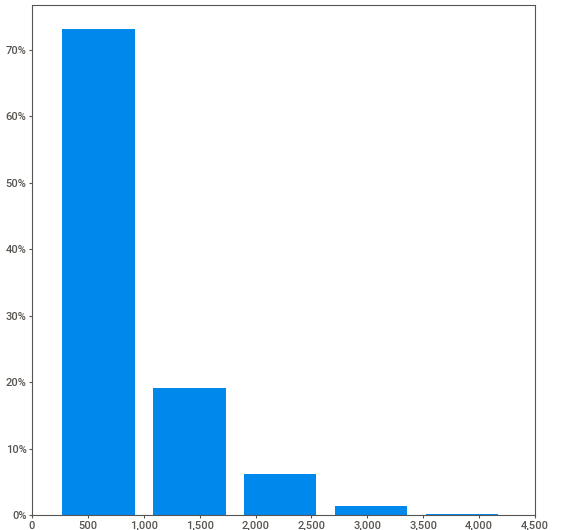
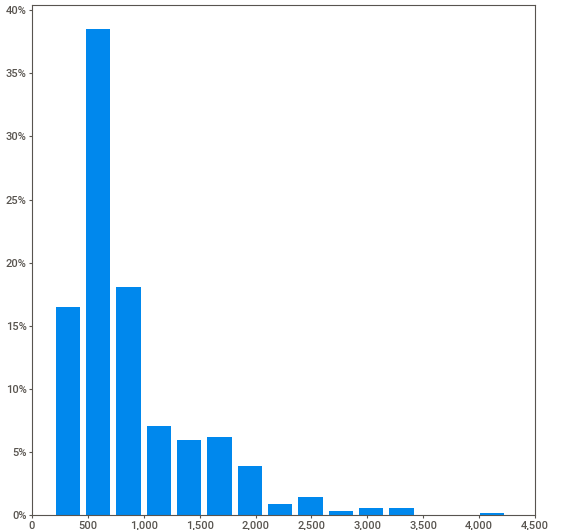
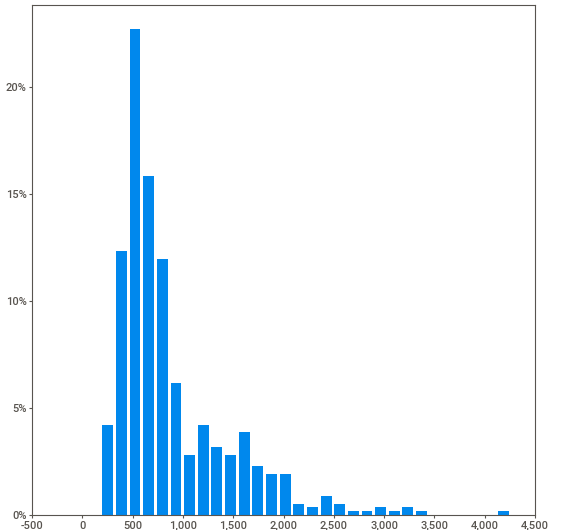
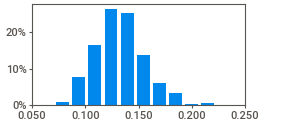
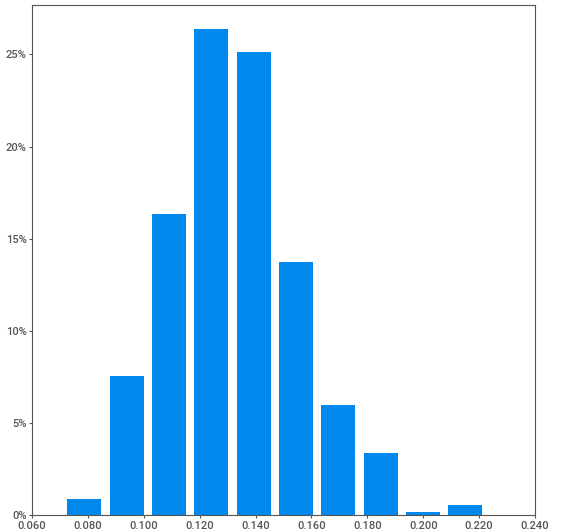
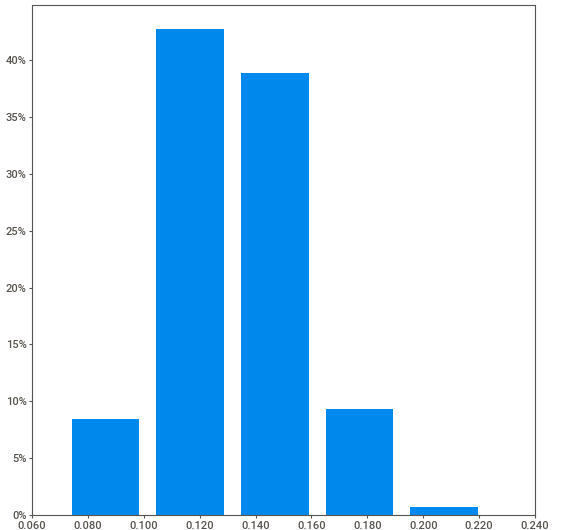
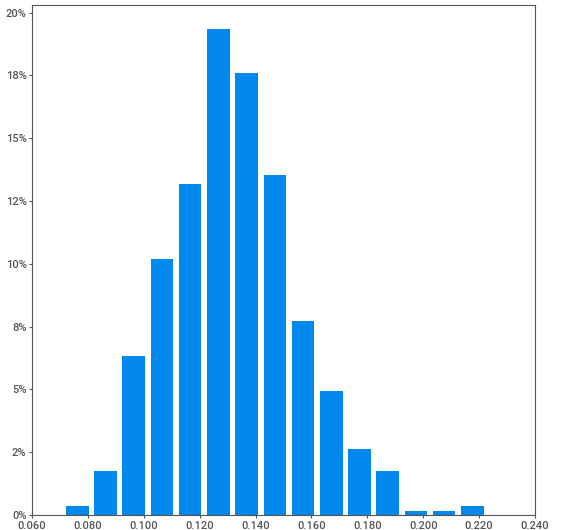
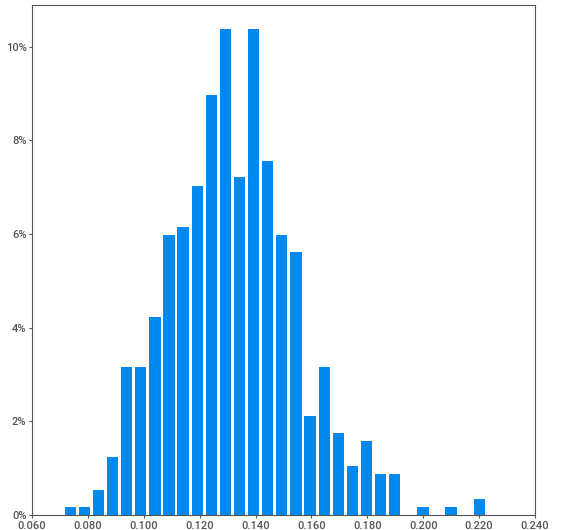
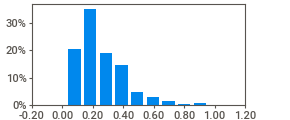
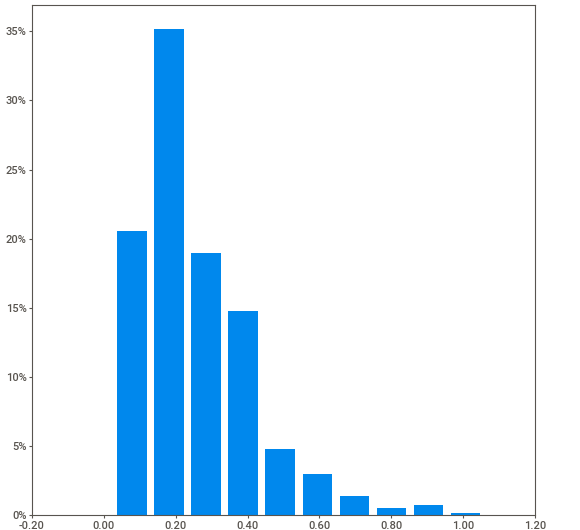
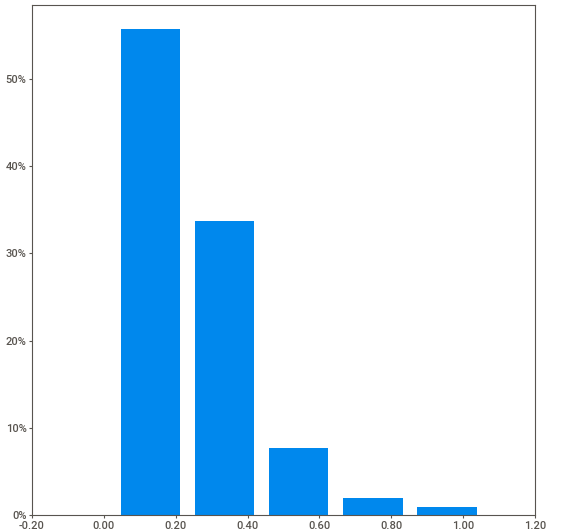
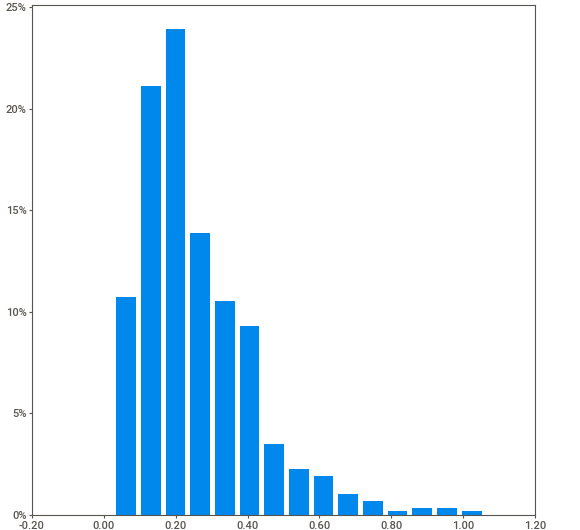
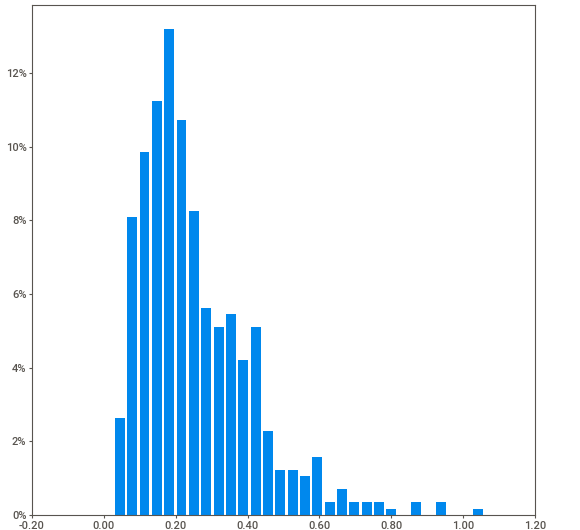
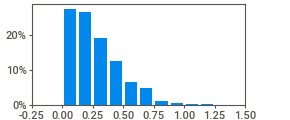
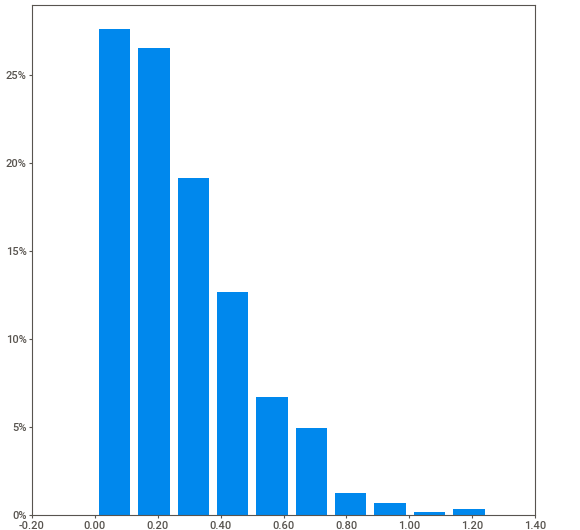
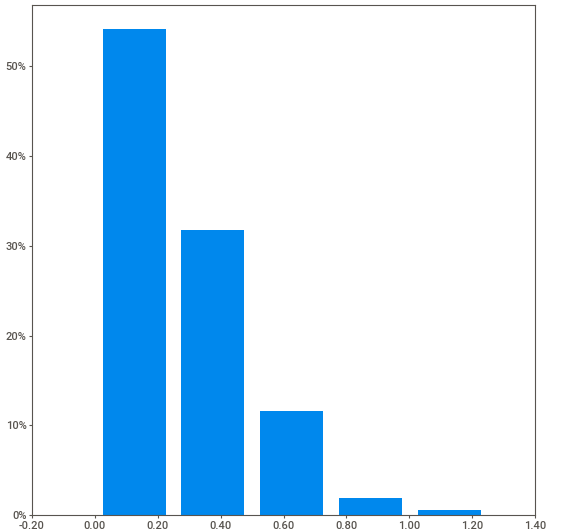
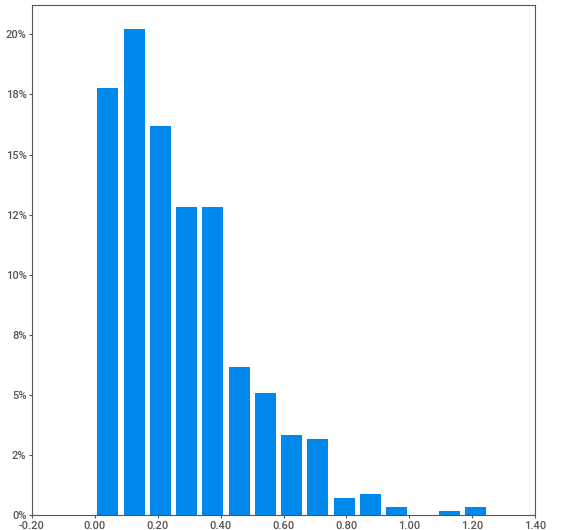
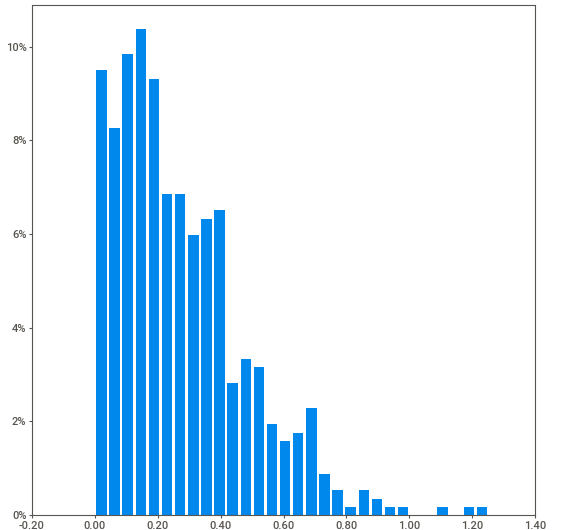
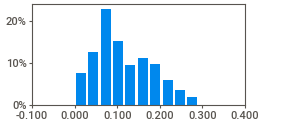
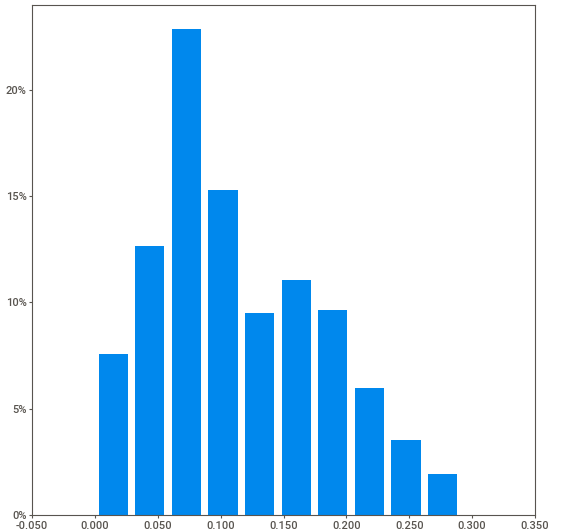
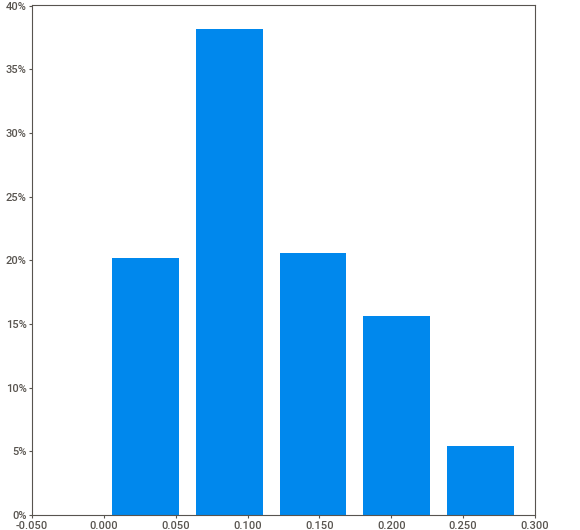
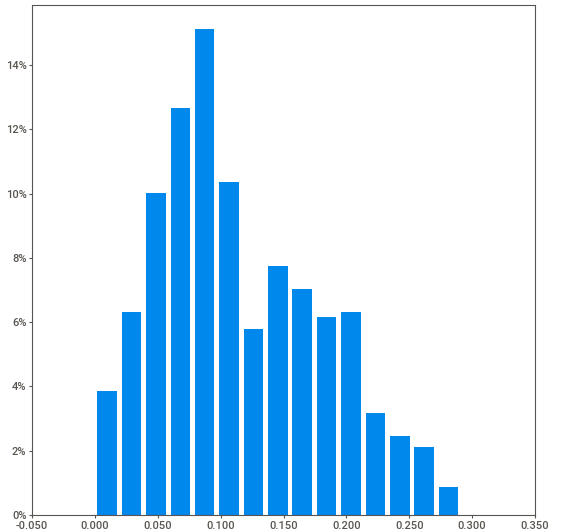
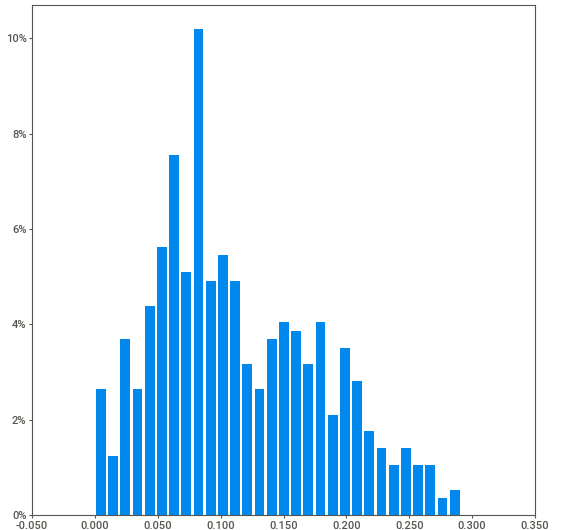
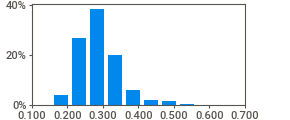
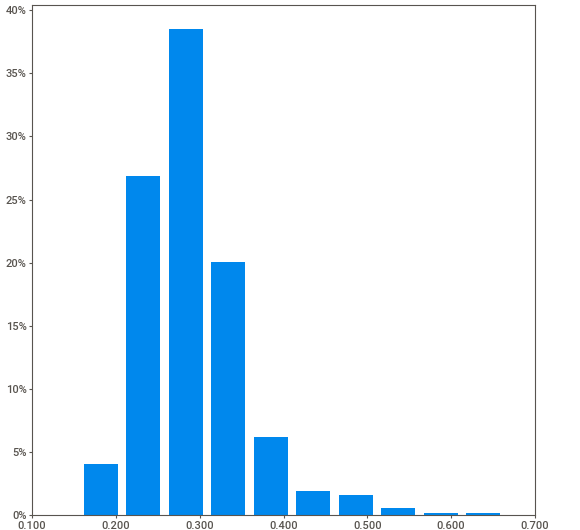
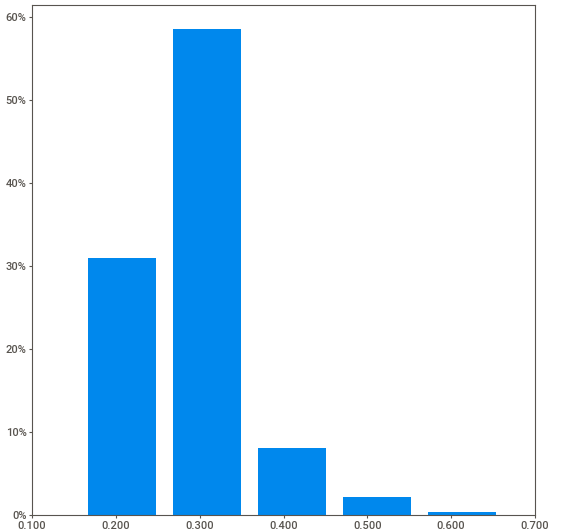
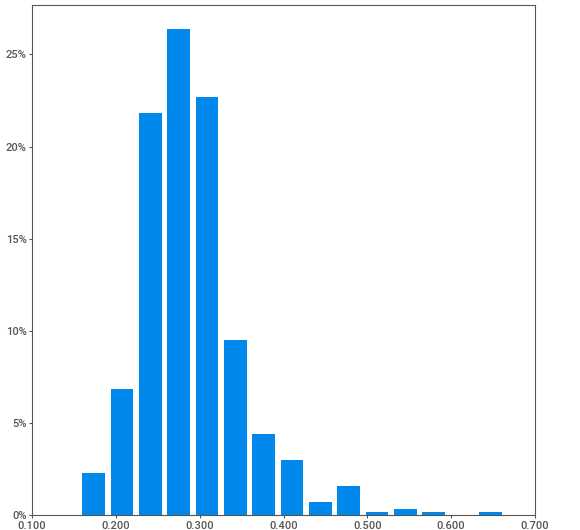
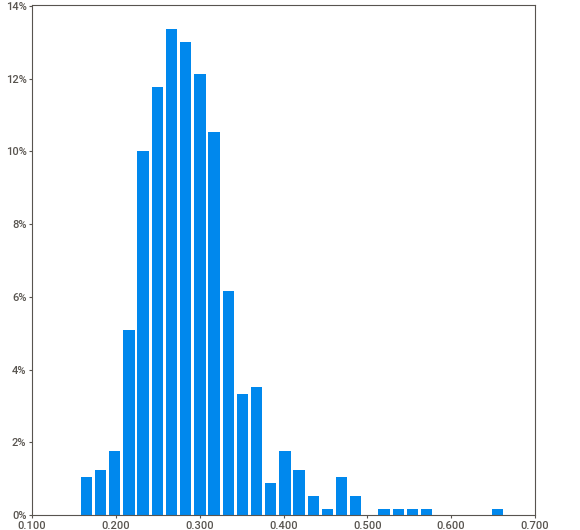
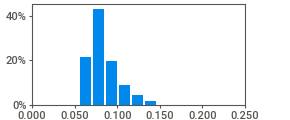
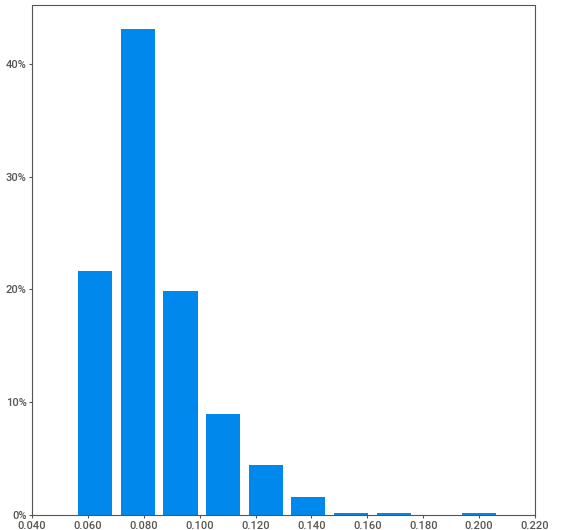
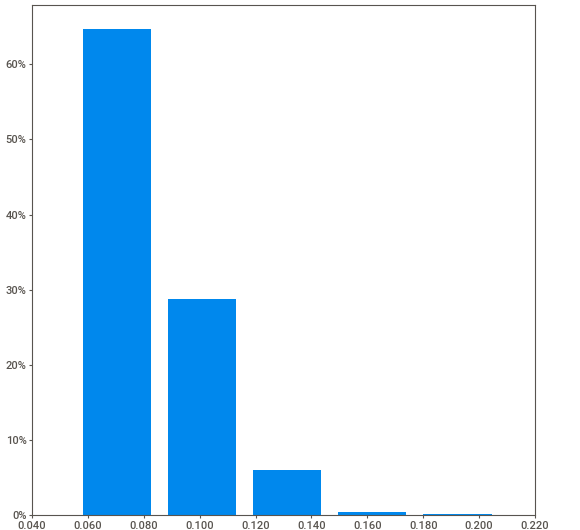
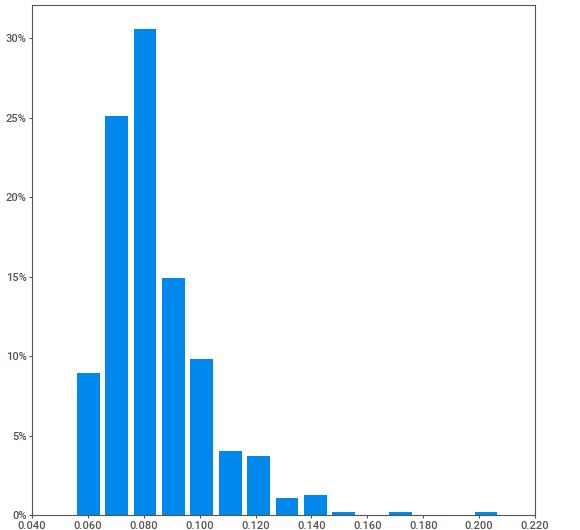
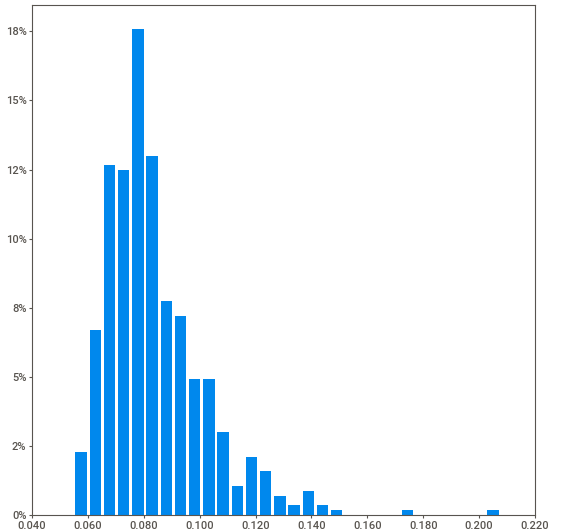
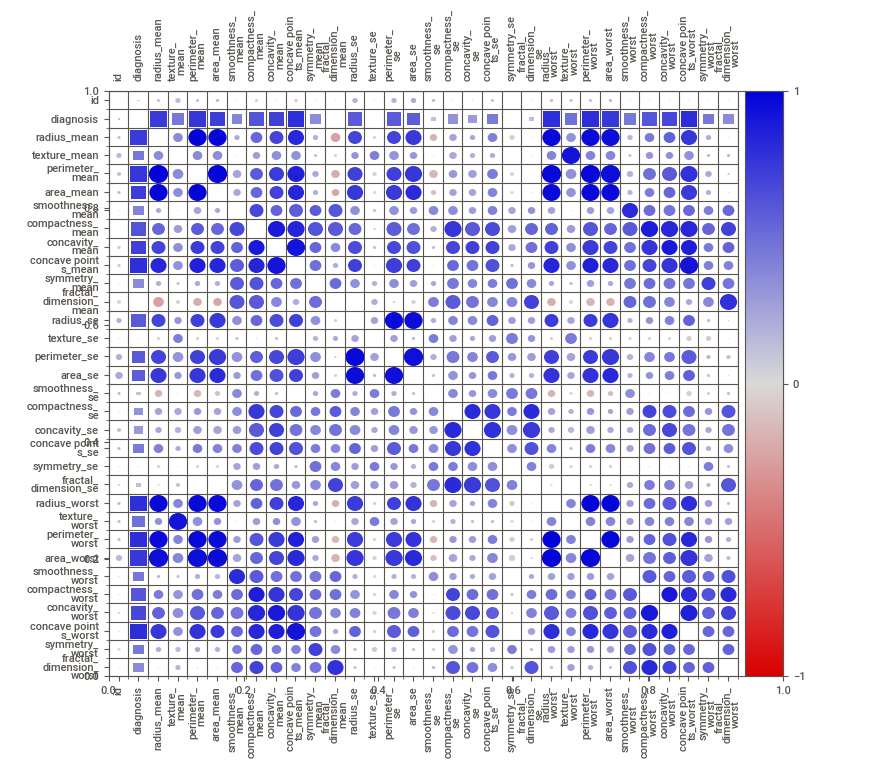
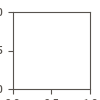

In [11]:
report = sv.analyze(data)
report.show_notebook()

In [12]:
px.histogram(data_frame=data, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [13]:
px.histogram(data_frame=data,x=data.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [14]:
px.scatter(data_frame=data,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

## Data Preprocessing

In [15]:
data.drop('id', axis=1, inplace=True)

In [16]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
data.sample(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
242          0        11.30         18.19           73.93     389.40   
415          0        11.89         21.17           76.39     433.80   
29           1        17.57         15.05          115.00     955.10   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
242             0.10              0.13            0.15                 0.03   
415             0.10              0.08            0.03                 0.02   
29              0.10              0.12            0.10                 0.08   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
242           0.21  ...         12.58          27.96            87.16   
415           0.20  ...         13.05          27.21            85.09   
29            0.17  ...         20.01          19.52           134.90   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
242      472.90              0.13               0.48             0.74   
415      522.90              0.14               0.22             0.12   
29      1227.00              0.13               0.28             0.25   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
242                  0.12            0.33                     0.13  
415                  0.08            0.31                     0.07  
29                   0.15            0.28                     0.08  

[3 rows x 31 columns]

In [18]:
corr = data.corr()

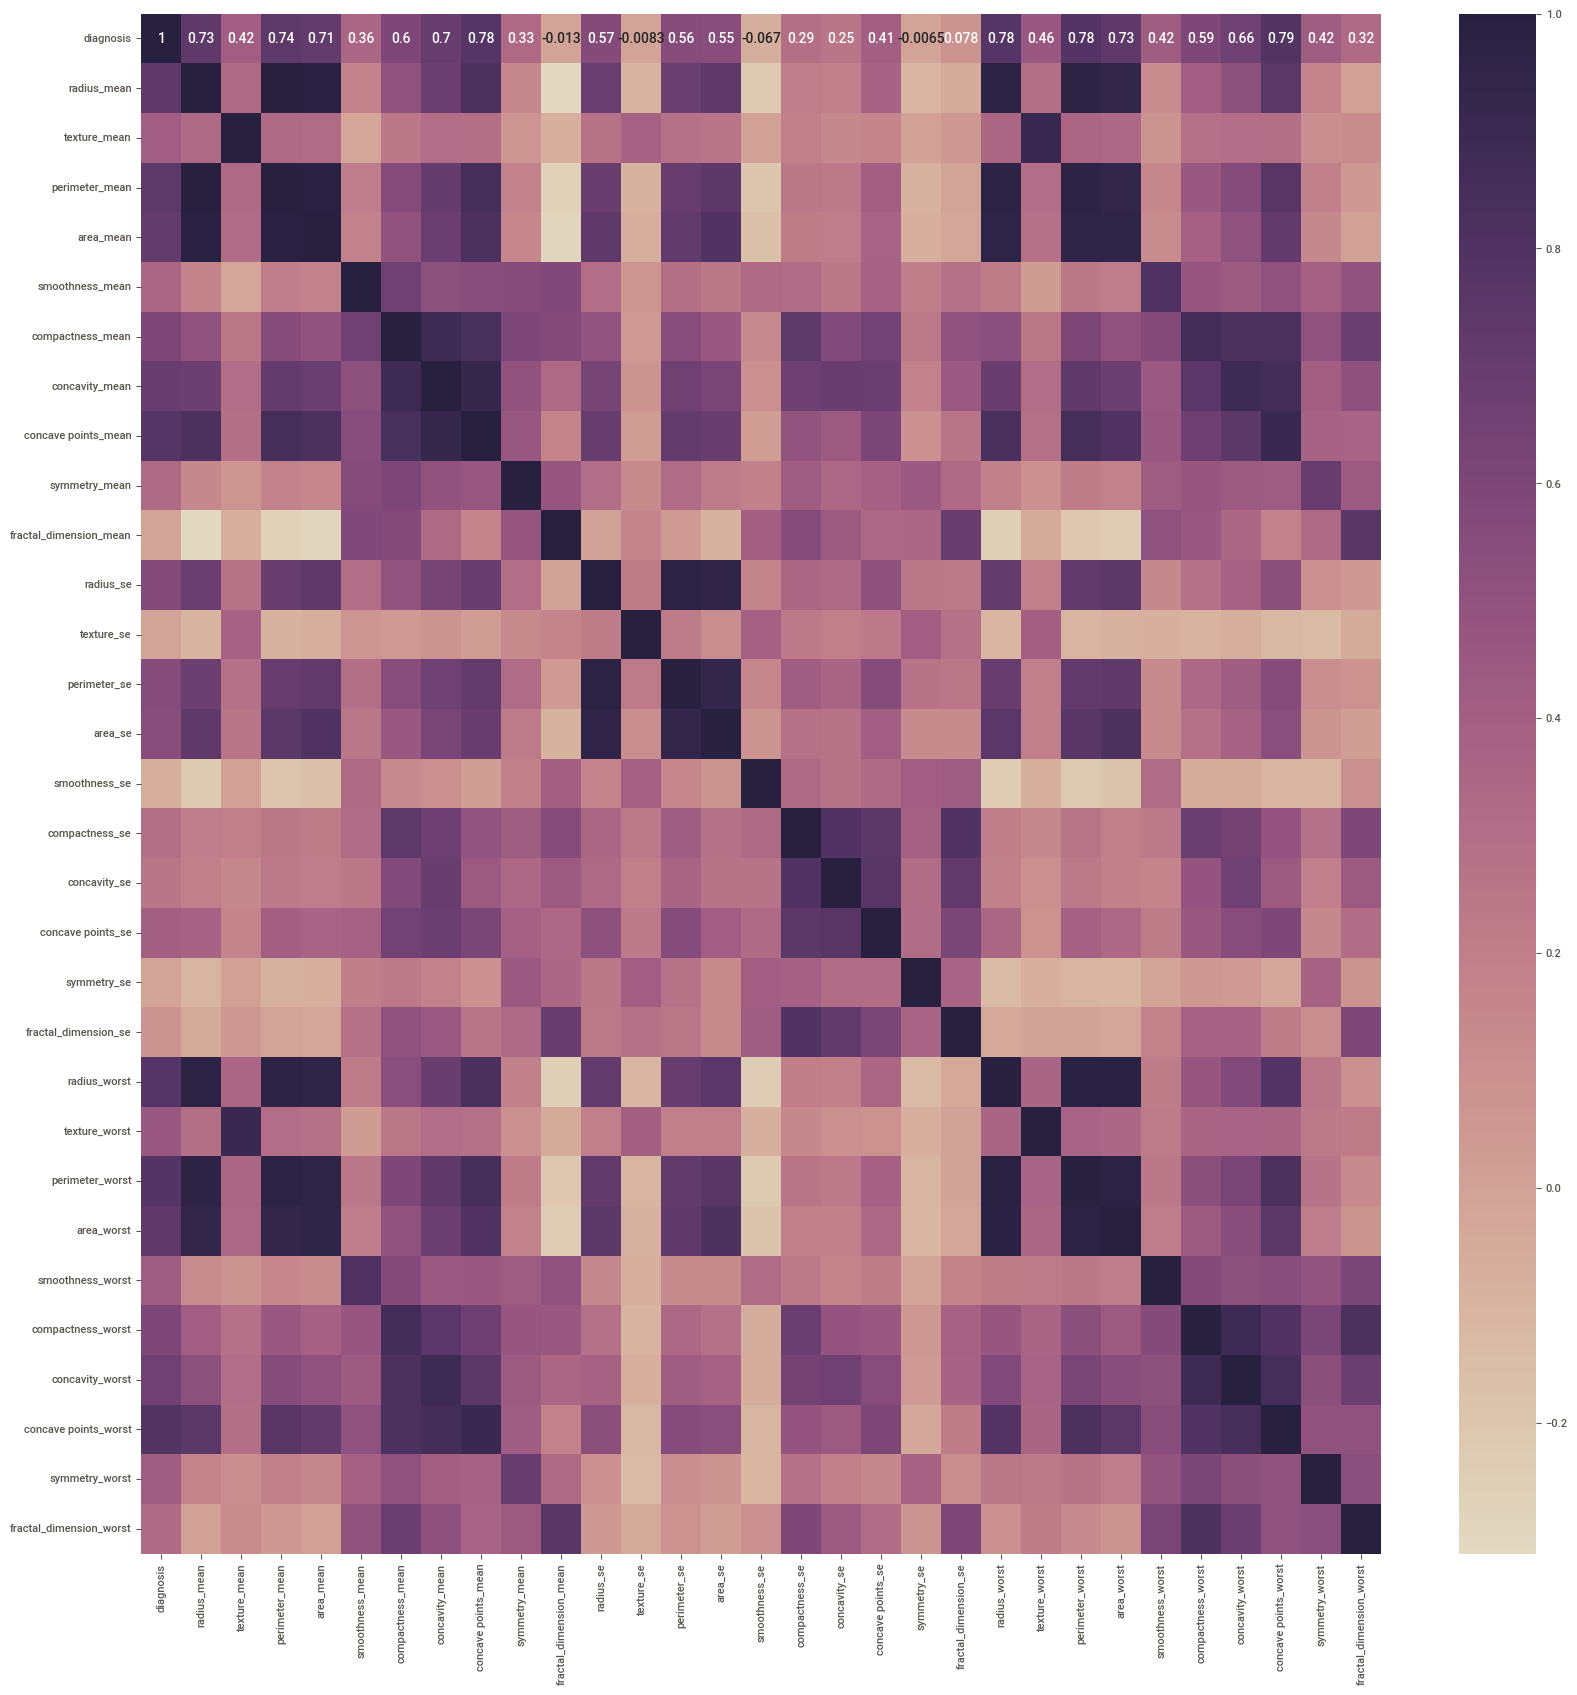

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

In [20]:
X, y = data[names], data['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=RANDOM_STATE)

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
# models

lg = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=RANDOM_STATE, max_iter=10_000)

param_grid = dict(
    penalty=['l1', 'l2'],
    C = [10**i for i in range(-3, 2)]
)

kf = KFold(n_splits=5, shuffle=True, random_state=100)

clf = GridSearchCV(lg, param_grid, scoring='f1', cv=kf, refit=True)

search = clf.fit(X_train_sc, y_train)

search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [23]:
results = train_evaluate_model(search, X_train_sc, y_train, X_test_sc, y_test)

In [24]:
results.index = ['LogisticRegression']

results.sort_values(by='f1_score', ascending=False)

accuracy  f1_score  precision  recall  balanced_accuracy
LogisticRegression      0.97      0.96       1.00    0.93               0.96

In [25]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE) # not scale X values

param_grid = {
    'min_samples_split': [i / 10 for i in range(1, 6)],
    'max_depth': [1, 10, 100, 200, 300,  None],
    'min_samples_leaf': [i / 10 for i in range(1, 6)],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [26]:
search = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=5, refit=True)

search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 10, 100, 200, 300, None],
                         'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='roc_auc')

In [27]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [28]:
decision_tree_results = train_evaluate_model(search, X_train, y_train, X_test, y_test)

decision_tree_results.index=['DecisionTree']
results = pd.concat([results, decision_tree_results])

In [29]:
results

accuracy  f1_score  precision  recall  balanced_accuracy
LogisticRegression      0.97      0.96       1.00    0.93               0.96
DecisionTree            0.90      0.85       0.97    0.76               0.87

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

param_grid = {
    'n_neighbors': [i for i in range(1, 31, 2)]
}

search = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=5, refit=True)

search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             scoring='roc_auc')

In [31]:
knn_results = train_evaluate_model(search, X_train_sc, y_train, X_test_sc, y_test)

knn_results.index=['KNN']
results = pd.concat([results, knn_results])

In [32]:
results.sort_values(by='f1_score', ascending=False)

accuracy  f1_score  precision  recall  balanced_accuracy
LogisticRegression      0.97      0.96       1.00    0.93               0.96
KNN                     0.96      0.94       1.00    0.88               0.94
DecisionTree            0.90      0.85       0.97    0.76               0.87

In [33]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# determine the hyperparameter space
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 250],
    'min_samples_split': [i / 10 for i in range(1, 6)],
    'max_depth': [1, 10, 100, 200, 300, None]
}

search = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=5, refit=True)

search.fit(X_train, y_train)

rf_results = train_evaluate_model(search, X_train, y_train, X_test, y_test)

rf_results.index=['RandomForest']
results = pd.concat([results, rf_results])

results.sort_values(by='f1_score', ascending=False)

accuracy  f1_score  precision  recall  balanced_accuracy
LogisticRegression      0.97      0.96       1.00    0.93               0.96
KNN                     0.96      0.94       1.00    0.88               0.94
RandomForest            0.95      0.92       1.00    0.86               0.93
DecisionTree            0.90      0.85       0.97    0.76               0.87

In [34]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

In [35]:
results = pd.concat([results, xgboost_result])

results.sort_values(by='f1_score', ascending=False)

accuracy  f1_score  precision  recall  balanced_accuracy
XGBoost                 0.98      0.98       1.00    0.95               0.98
LogisticRegression      0.97      0.96       1.00    0.93               0.96
KNN                     0.96      0.94       1.00    0.88               0.94
RandomForest            0.95      0.92       1.00    0.86               0.93
DecisionTree            0.90      0.85       0.97    0.76               0.87

In [36]:
Naive_Bayes = GaussianNB()
nb_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
nb_result.index = ['NaiveBayes']
results = pd.concat([results, nb_result])

results.sort_values(by='f1_score', ascending=False)

accuracy  f1_score  precision  recall  balanced_accuracy
XGBoost                 0.98      0.98       1.00    0.95               0.98
LogisticRegression      0.97      0.96       1.00    0.93               0.96
KNN                     0.96      0.94       1.00    0.88               0.94
RandomForest            0.95      0.92       1.00    0.86               0.93
NaiveBayes              0.94      0.91       0.95    0.88               0.93
DecisionTree            0.90      0.85       0.97    0.76               0.87

## Conclusion

- XGBoost outperforms other algorithms in terms of all metrics mentioned here.

- Decision Tree algorithm performed poorly for this dataset.